In [ ]:
# !pip install squarify

# install seabonrn after turning the session on. After installing restart the kernel
# !pip install seaborn==0.13.2

In [1]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [2]:
%%capture
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

2024-03-11 09:49:39.814942: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 09:49:39.815066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 09:49:39.967739: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
title_font = {'fontname': 'serif'}
label_font = {'fontname': 'monospace', 'fontsize': 14}

In [4]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [5]:
#Let's check the Shape of data
print(f'The Train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'The Test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')
print(f"The Original dataset hss {original.shape[0]} rows and {original.shape[1]} columns")

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns
The Original dataset hss 2111 rows and 17 columns


In [6]:
#Let's check the samples of data
display('Train:',df_train.head())
display('Test:',df_test.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


'Test:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [8]:
df_train.drop(columns=["id"]).describe().style.background_gradient(cmap='YlOrRd', axis=1)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


**Original Data**

In [9]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
original.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [11]:
original.describe().style.background_gradient(cmap='YlOrRd', axis=1)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Both the Original data and the train data has similar statistical characteristics**

In [12]:
def catplots(dataframe, col_name, style, hue=None):
#     plt.style.use('seaborn-v0_8-pastel')
    sns.set_style("dark")
    plt.style.use(style)
    figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))
#     colors = sns.color_palette('dark')
    figure.suptitle(col_name, fontsize=16, **title_font)
    order = dataframe[col_name].value_counts().index
    order_val = dataframe[col_name].value_counts().values
    
    cat_df = pd.DataFrame(dataframe[col_name].value_counts()).reset_index()
    cat_df['pct'] = cat_df['count'].apply(lambda x: np.round( ( x / cat_df['count'].sum() ) * 100, 2) )
    
    pie_chart = dataframe[col_name].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], shadow=True)
    axes[0].set_ylabel('')
#     axes[0].grid(False)
    
    for text in pie_chart.texts:
        text.set_fontsize(16)
    
    fig_bar = sns.countplot(data=dataframe,
                           y=col_name,
                           order=order,
#                            palette='coolwarm_r',
                           ax=axes[1],
                           )
    
    fig_bar.set_xlabel('')
    fig_bar.set_ylabel('')
    axes[1].set_yticklabels(order, **label_font)
#     axes[1].grid(False)
    
    
    for p, val, pct in zip(fig_bar.patches, order_val, cat_df['pct']):
        fig_bar.annotate(f"{val}", (p.get_width(), p.get_y() + p.get_height() / 2),
                        xytext=(38, -2),
                        textcoords='offset points',
                        fontsize=14,
                        ha='center'
                        )
    
    
    fig_bar.tick_params(axis='x', which='both', bottom=False, 
                       top=False, labelbottom=False) 
    
    fig_bar_hue = sns.histplot(data=dataframe,
                           x=col_name,
                           hue=hue,
                           multiple='dodge',
                           shrink=0.8,
                           ax=axes[2])
    
    fig_bar_hue.set_xlabel('')
    fig_bar_hue.set_ylabel('')
    axes[2].set_yticklabels('')
#     axes[2].grid(False)
    
    for p in fig_bar_hue.patches:
        height = p.get_height()
        
        fig_bar_hue.text(x=p.get_x() + (p.get_width() / 2),
                        y=height+100,
                        ha='center',
                        s = f'{height}',
#                         fontsize=14,
                        **label_font)
    
    for pos in ['right', 'top', 'bottom', 'left']: 
        plt.gca().spines[pos].set_visible(False) 
    
    plt.tight_layout()
    plt.show()

In [13]:
cat_cols = [ cols for cols in df_train.columns if df_train[cols].dtype == 'object' ]
num_cols = [ cols for cols in df_train.columns if df_train[cols].dtype != 'object' ]

In [25]:
# plt.style.available

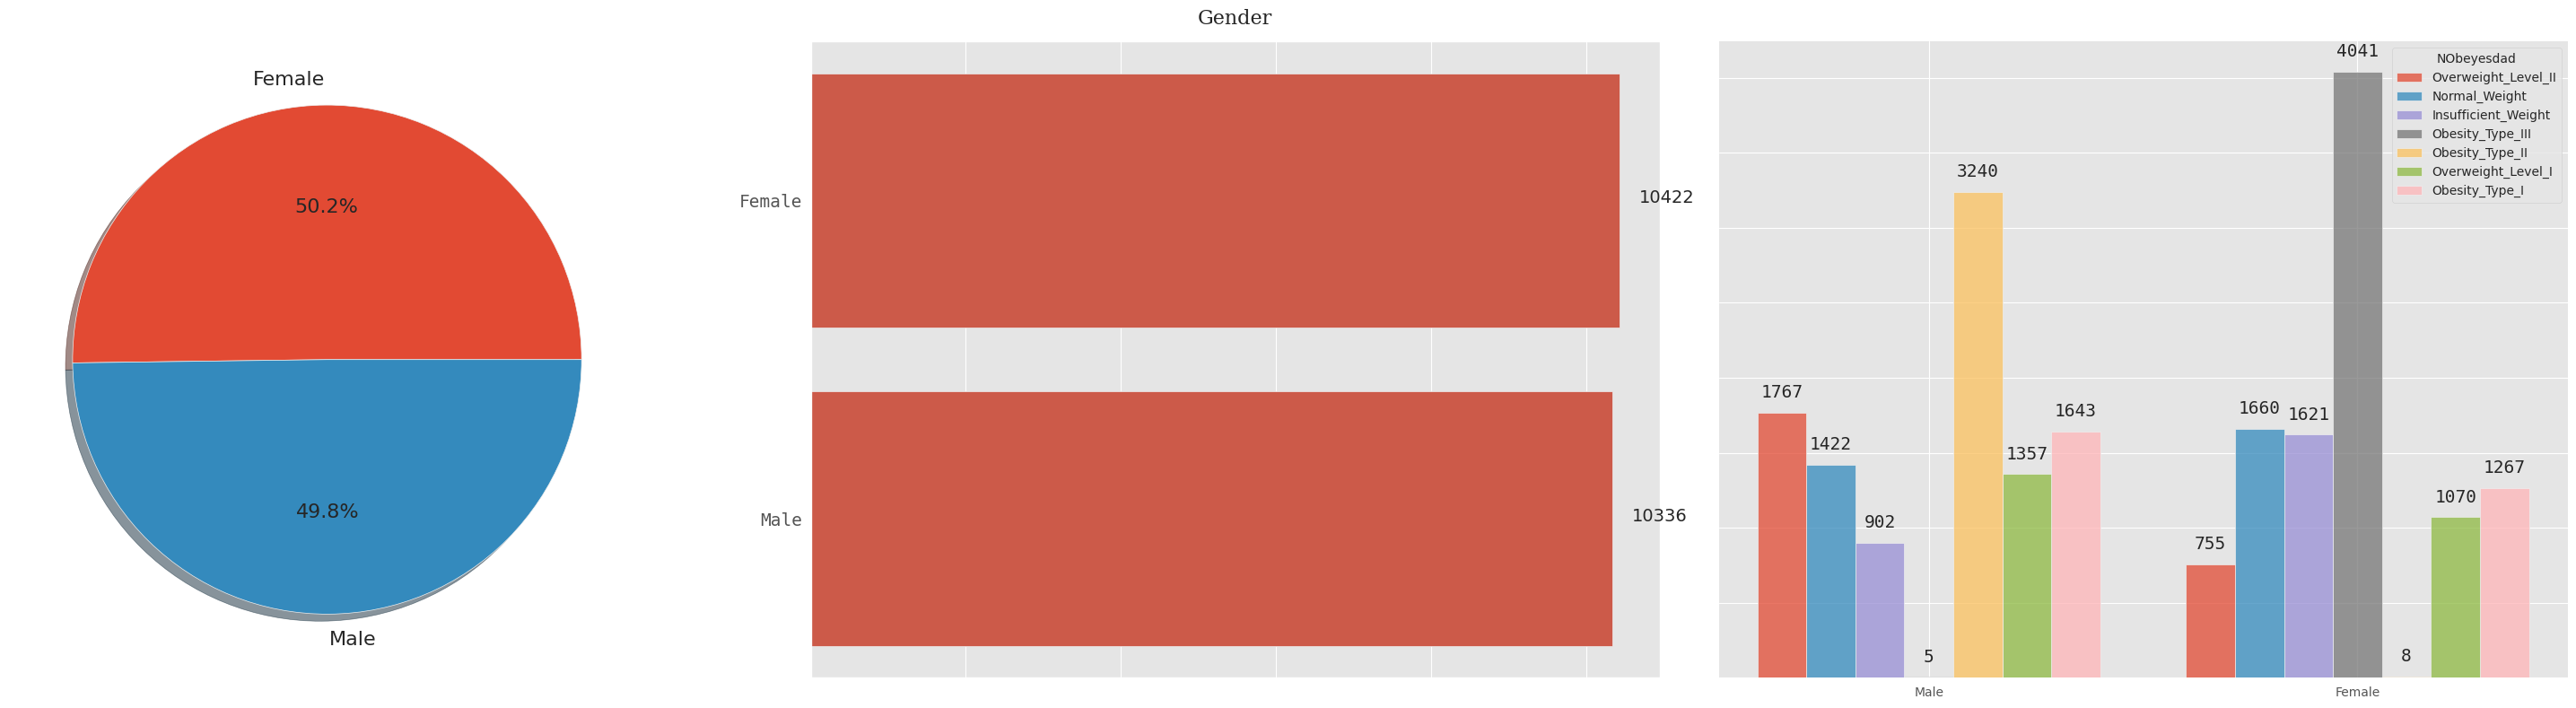

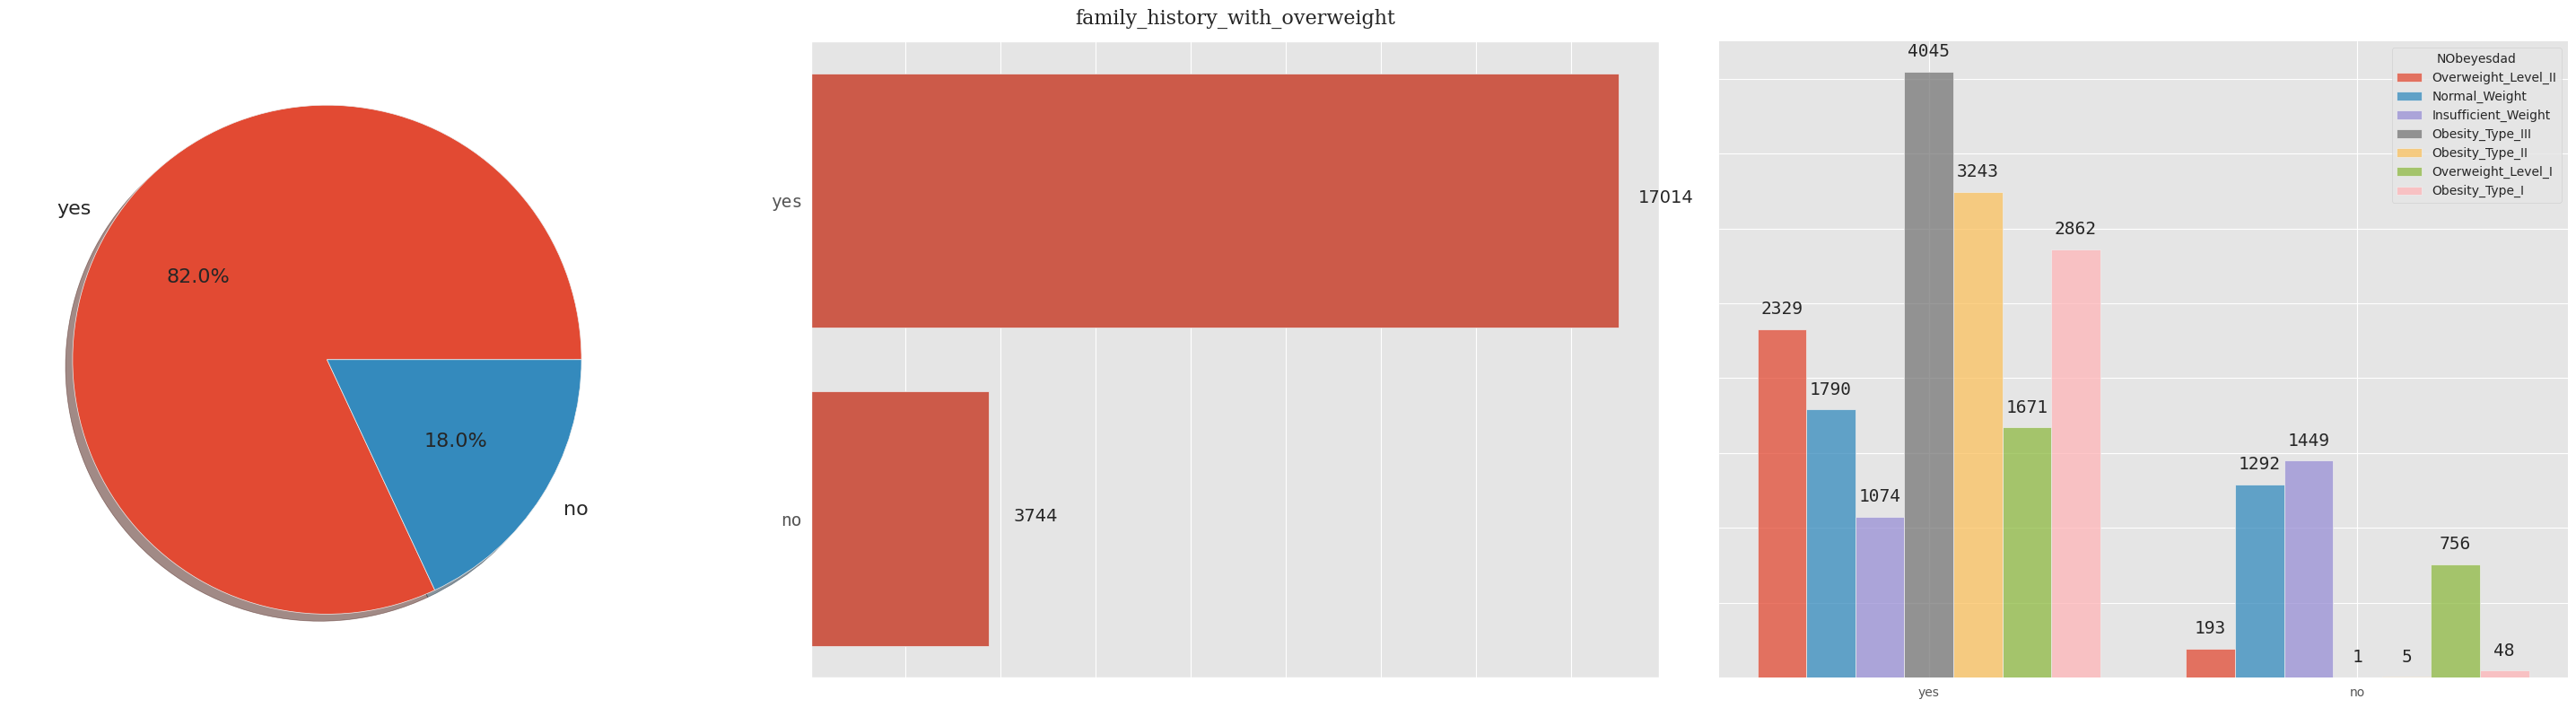

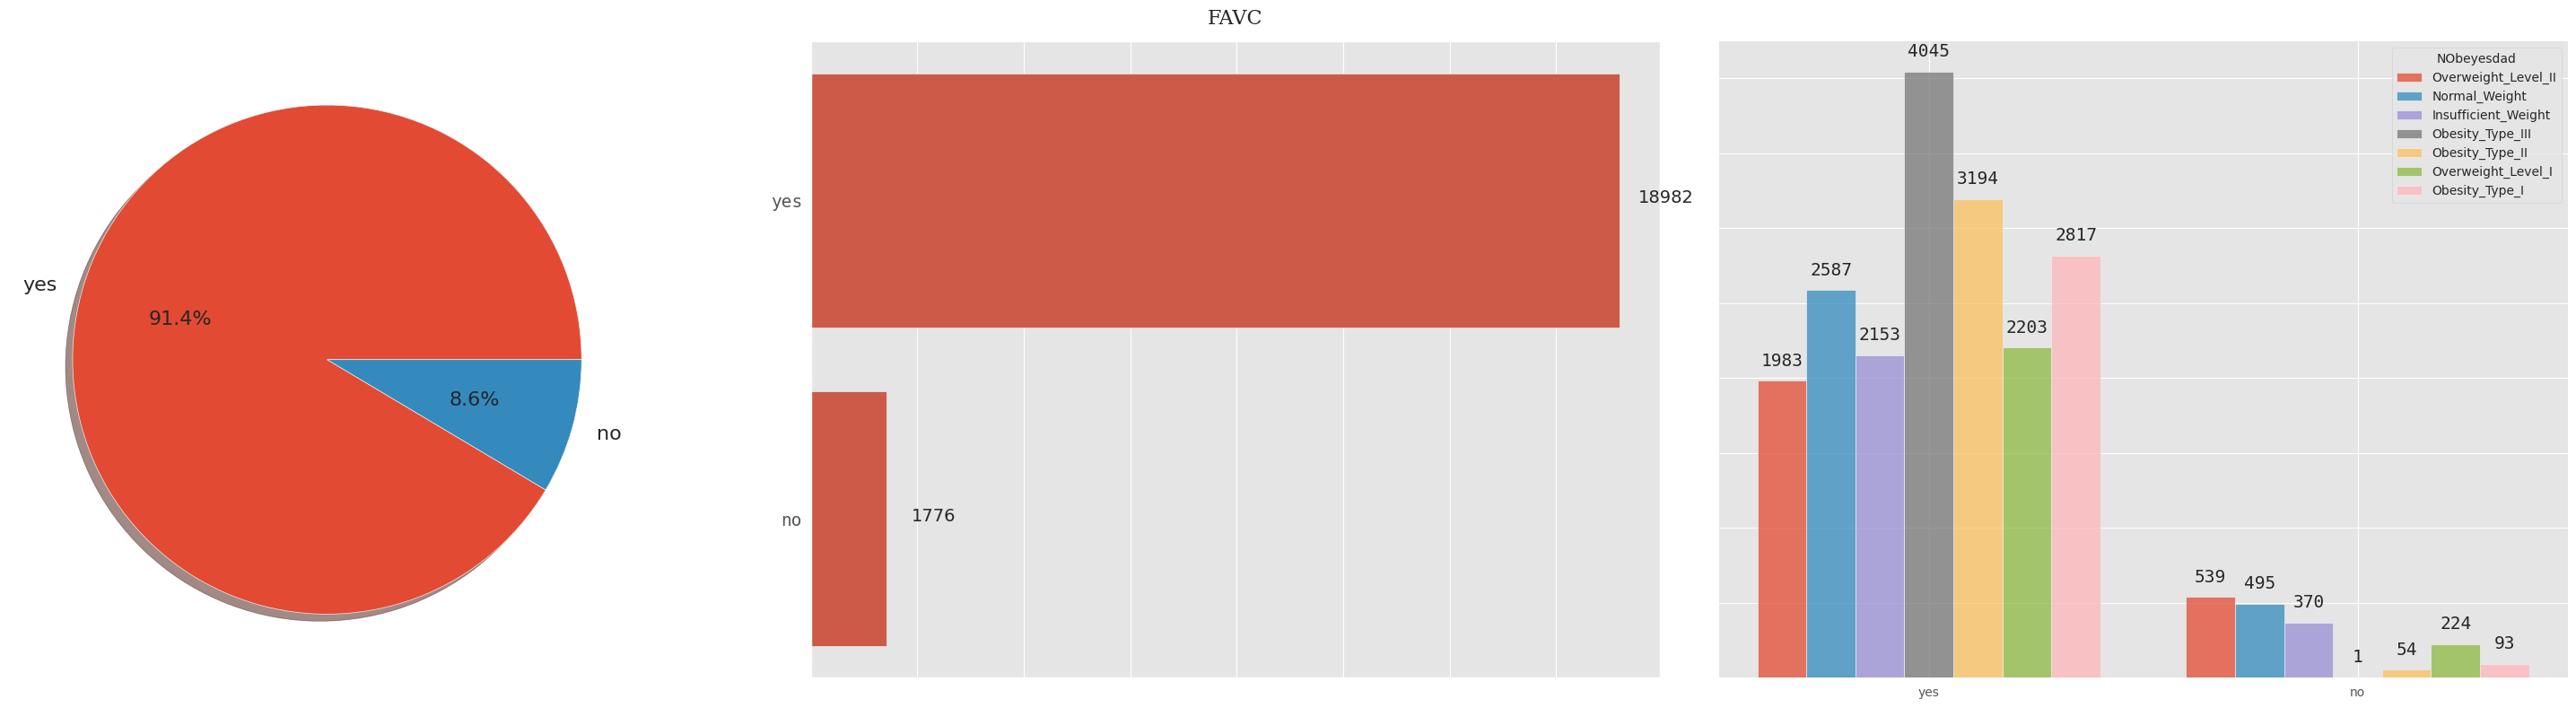

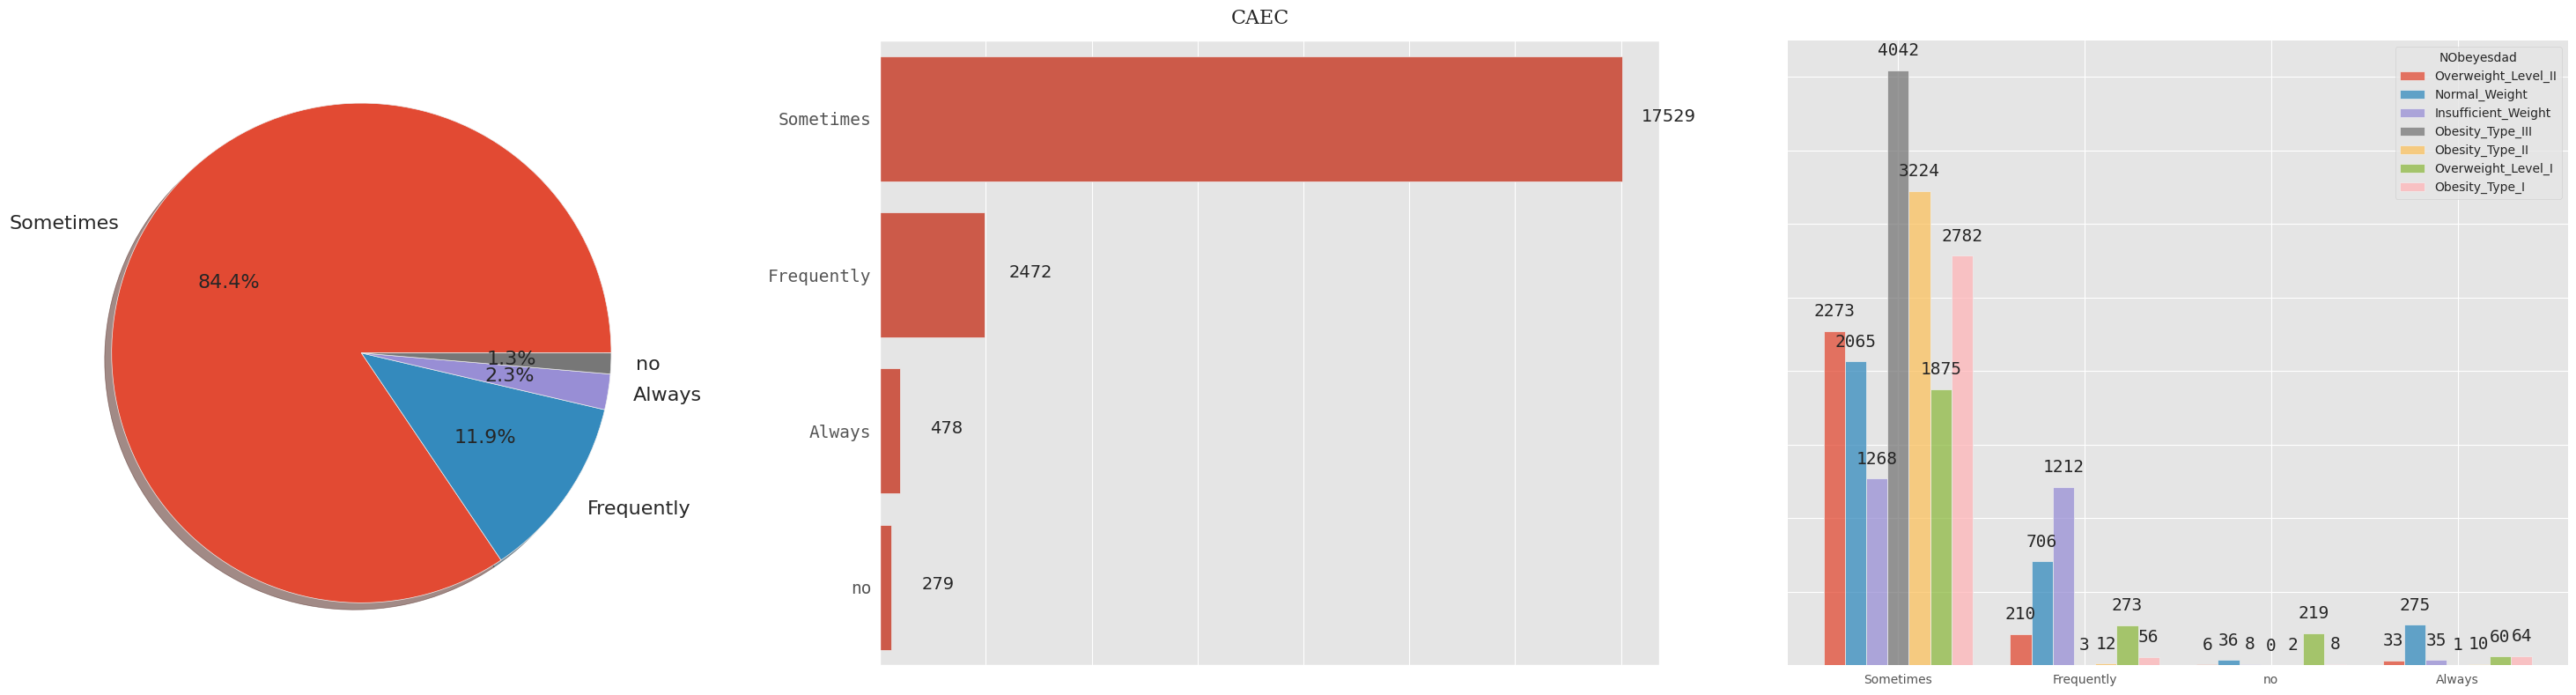

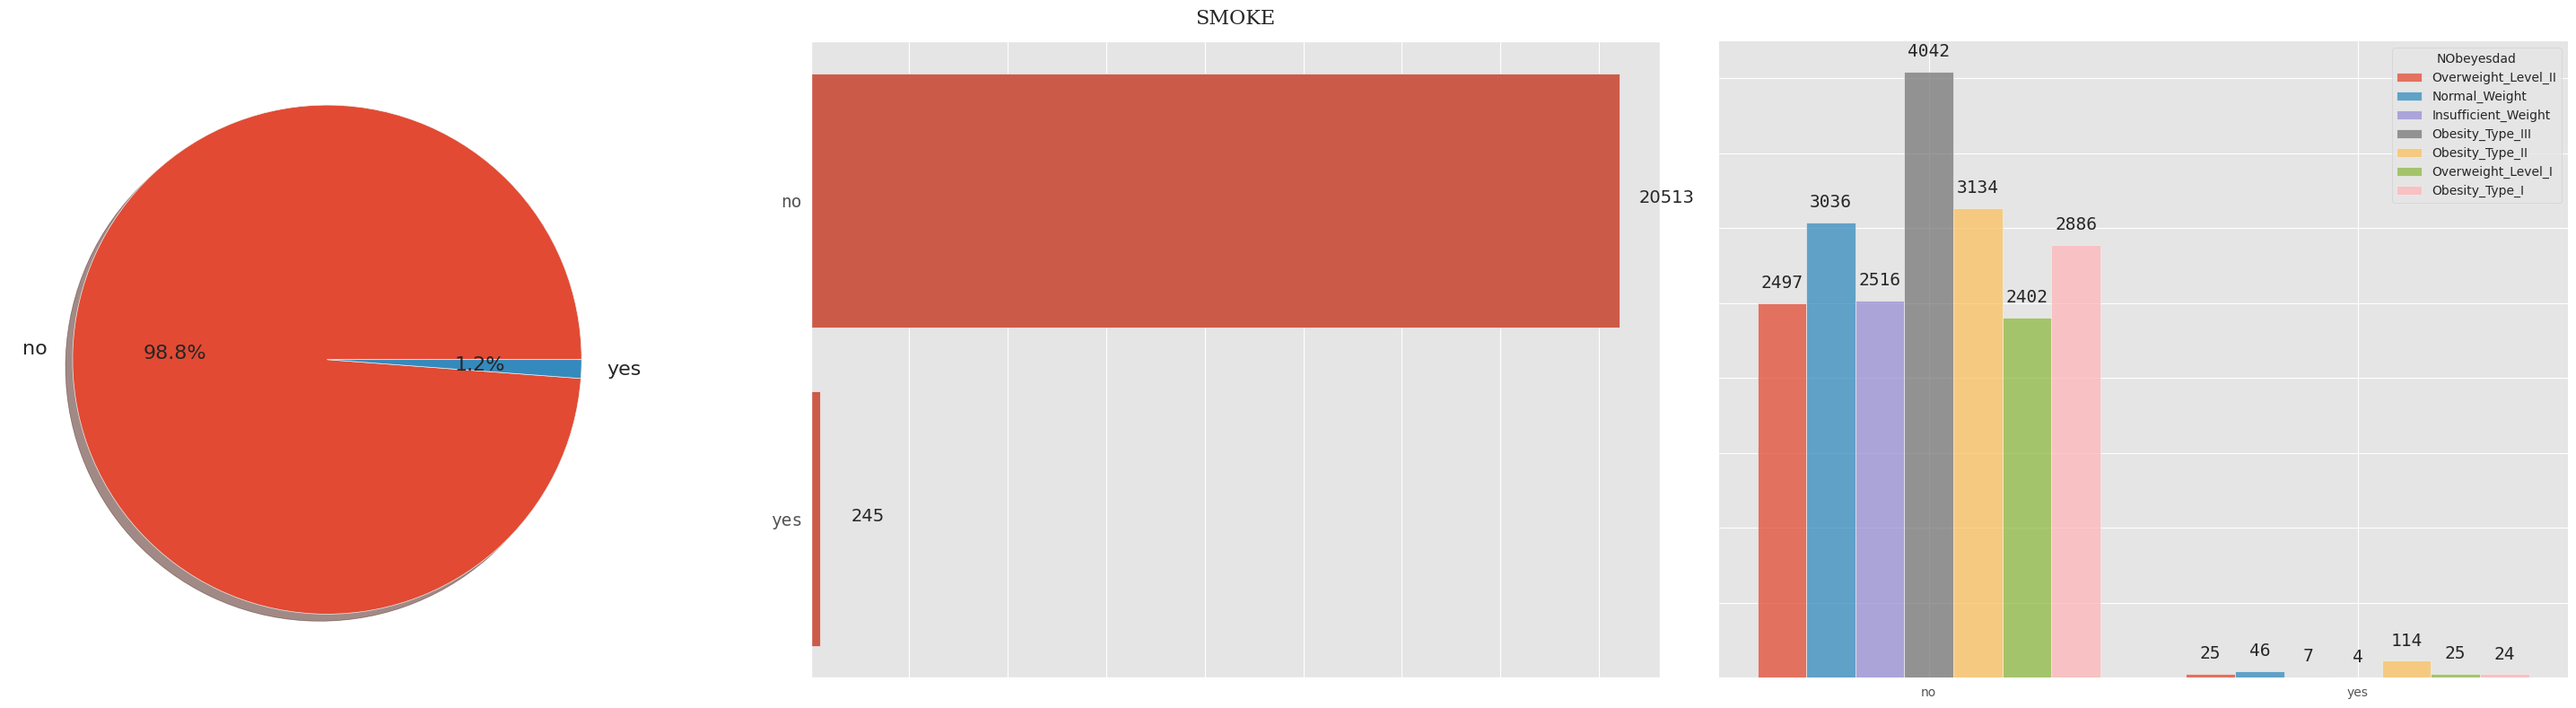

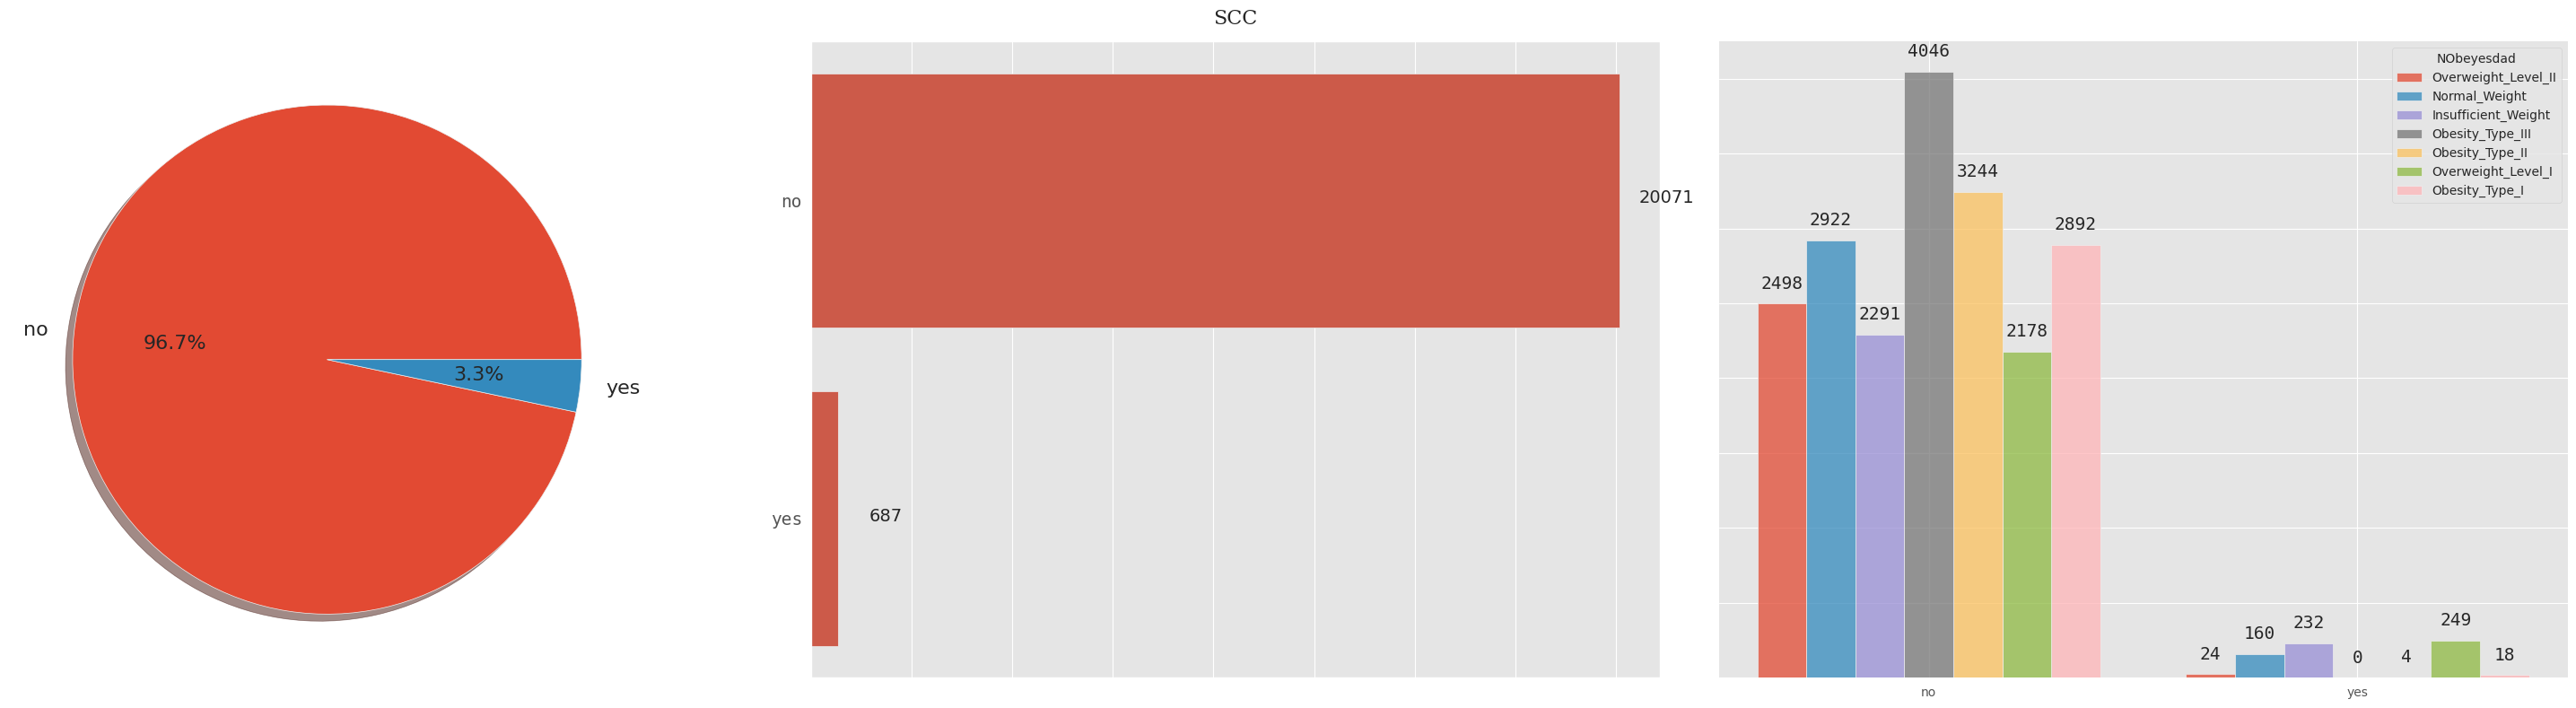

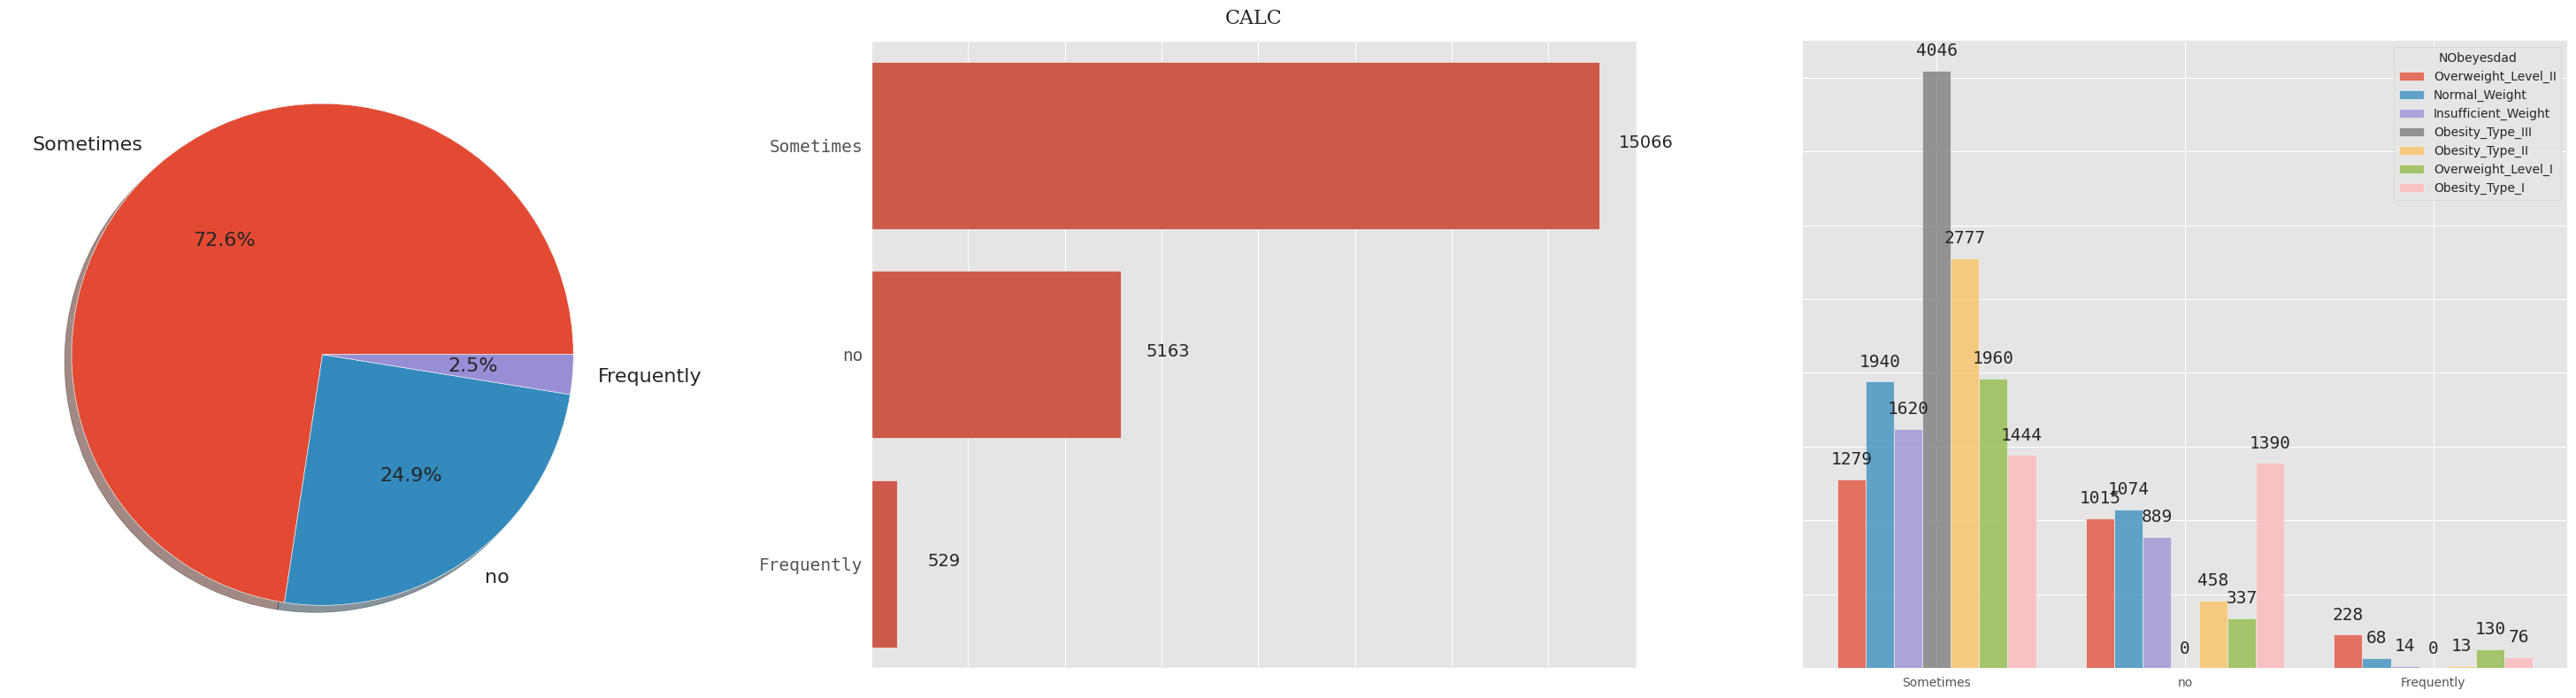

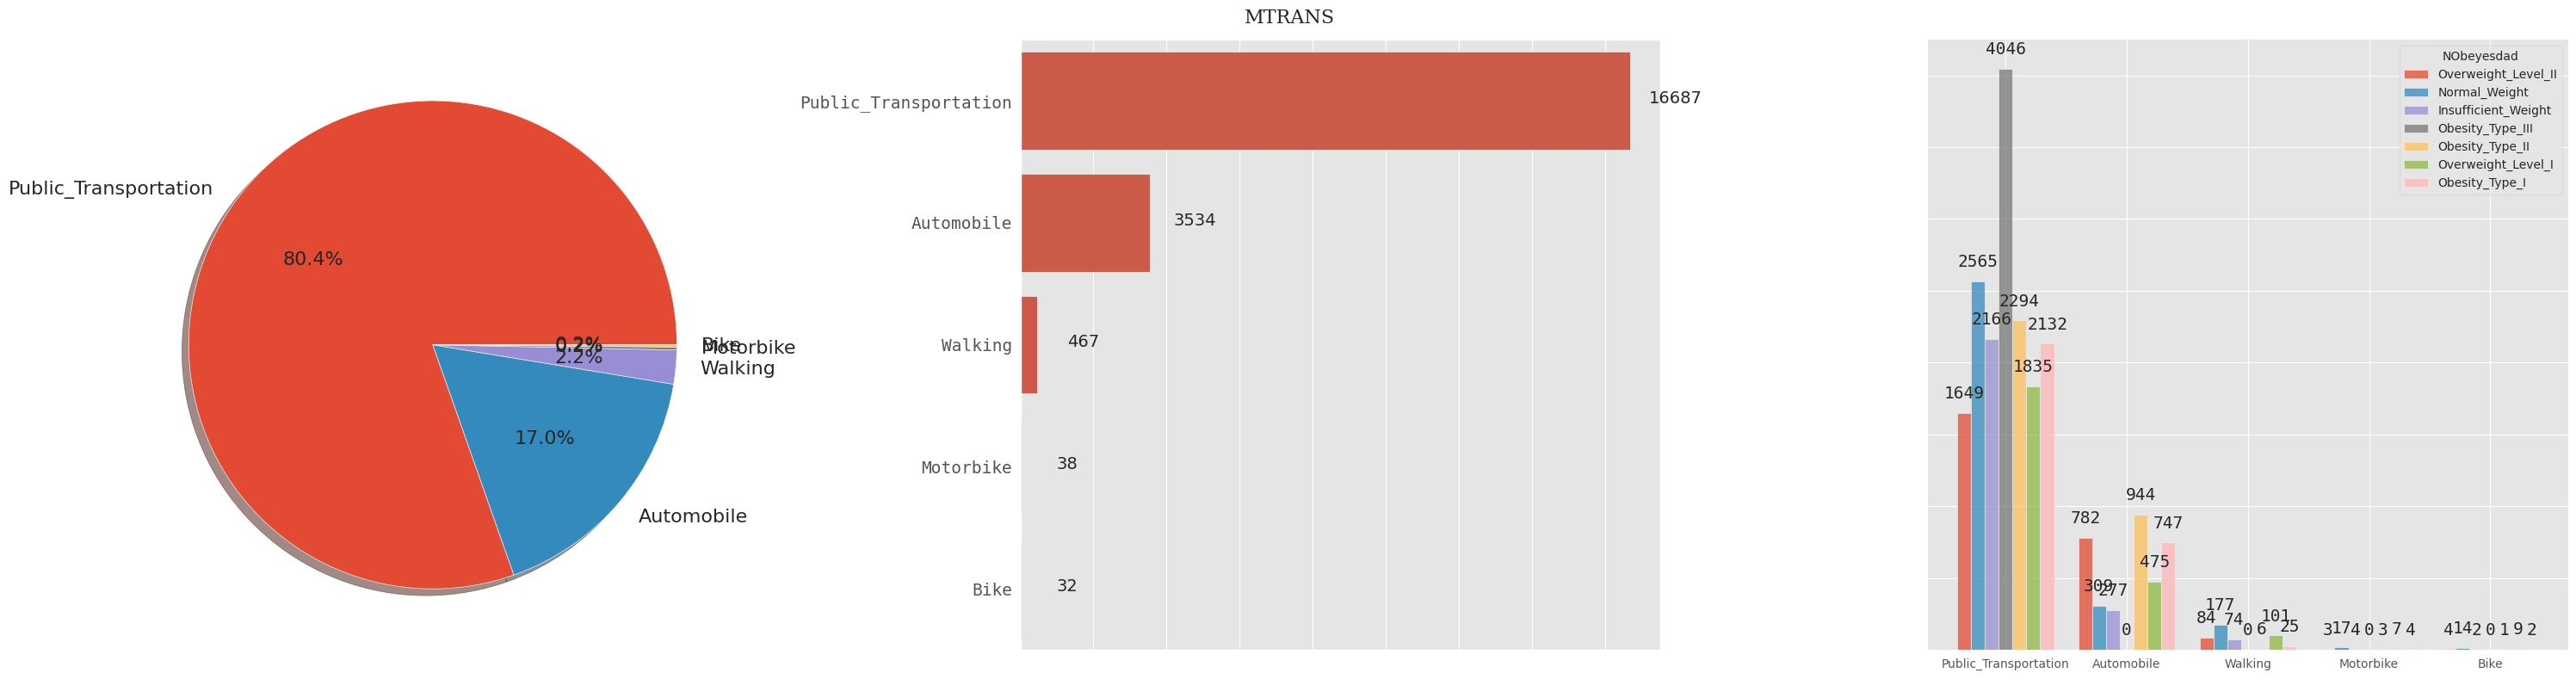

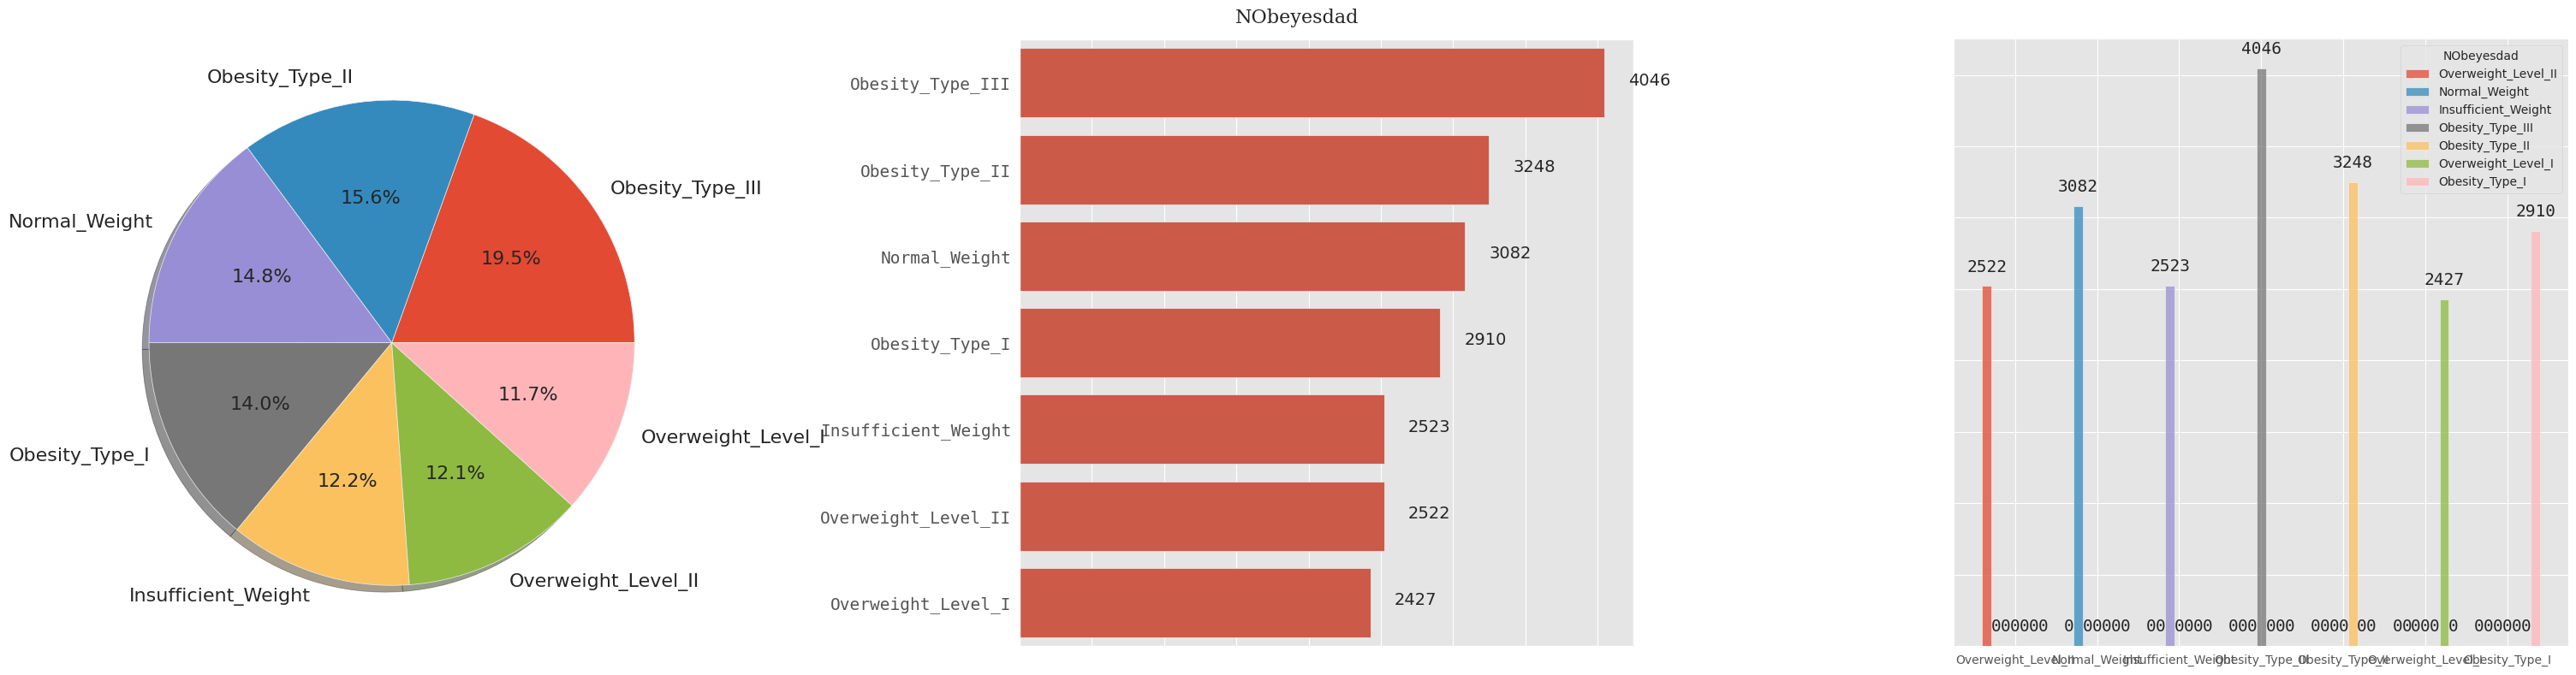

In [ ]:
style = 'ggplot'
for col in cat_cols:
    catplots(df_train, col, style, hue='NObeyesdad')

**Gender:** The Gender columns is farirly distributed with **50.2%** of Female and **49.8%** of Male. **Obesity type III** is more common among **Female**, where **Obesity type II** in Male

**Faimly history with Overweight**: **82%** of the family people has overweight issue in their family. So, most of the Obesity related problems are present among these people. **Insufficient Weight**, **Over weight Level I** are more common among those with no family history of overweight.

**Frequent Consumption of High Caloric Food (FAVC)**: **91%** people frequently consumes high caloric foods as a result most obesity risks are present with **4045** person having **Obesity type III** risk

**Consumption of food between meals (CAEC)**: As most of the data associated with **Sometimes** category **(84.4%)**, so it's pretty obvious that obesity risks will be more frequent here than the other categories. This feature is not very helpful, as people who always takes food between meals have less amount of people with obesity risks. However, We shouldn't conclude here.

**SMOKE**: There are only **1.2%** people who smokes in this dataset. And as the data about them is little compared to non-somkers, so not a lot of concrete information whether smoking relates to overweight issue.

**Calories consumption Monitoring (SCC)**: This is almost equivalent to **SMOKE** feature/column. Most of the data **(96.7%)** from **No** categories and it's not concrete whether this has relation with the target feature.

**Consumption of Alcohol (CALC)**: Among the **(2.5%)** frequent Alcohol takers **Overweight level 1** is prominent (Well not a lot of information about people who takes alcohol frequently). Among the **24%** of people who doesn't take alcohol has more of the **Obesity type I** problem.

**Transportation Used (MTRANS)**: Most of the data **(80%)** are from people who takes **Public Transport**, so the target categories are distributed here the most. **944** people have **Obesity type II** problem **3534** **(17%)** people who uses **Automobile**. 


**NObeyesdad**: Well, this is the target column (I am not saying anything about the name). ভাইরে ভাই। যাউকগা, The data is not balanced but it's kind of fairly distributed amonng the 7 classes, with **Obesity type III** having the most portion of the data.


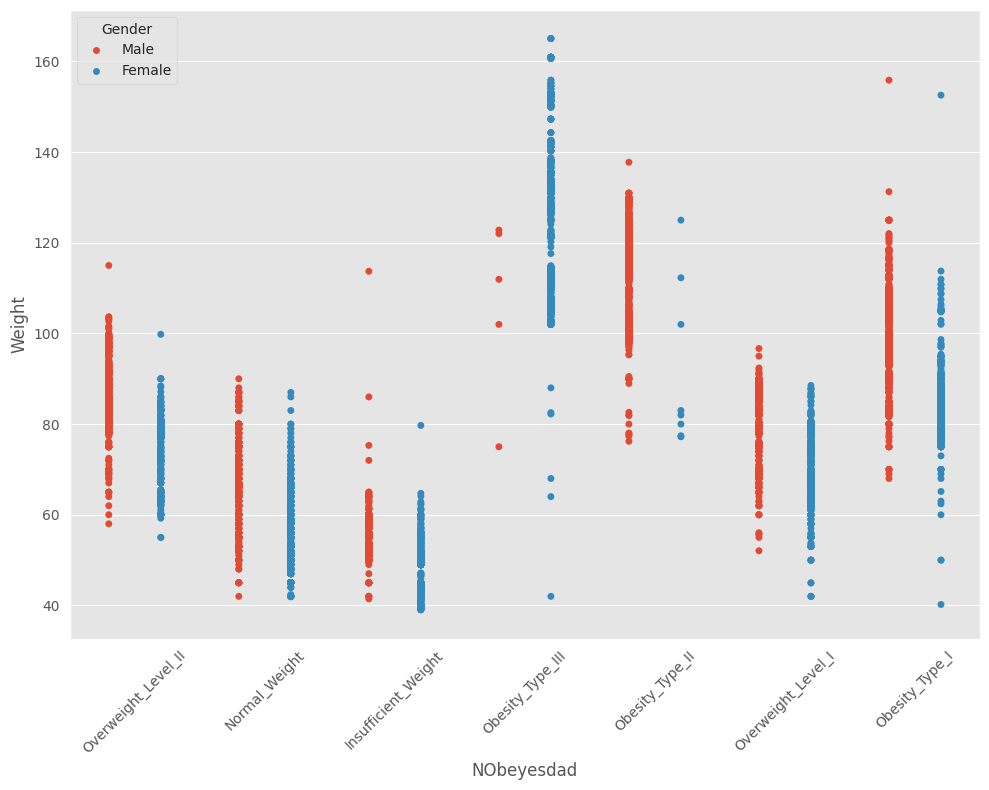

In [16]:
# sns.scatterplot(data=df_train, y="Age", x='NObeyesdad', hue='NObeyesdad')
plt.figure(figsize=(10, 8))
sns.stripplot(data=df_train, x="NObeyesdad", y="Weight", hue="Gender", jitter=False, dodge=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
def kde_plots(dataframe, col_name, style, hue=None):
    plt.style.use(style)
    figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    figure.suptitle(col_name, fontsize=16)
    
    
    fig_dis = sns.kdeplot(data=dataframe,
                         x=col_name, 
                         common_norm=False, 
                         alpha=.5, 
                         fill=True,
                         linewidth=0,
                         ax=axes[0])
    axes[0].grid(False)
    
    fig_dis_hue = sns.kdeplot(data=dataframe,
                         x=col_name, 
                         common_norm=False, 
                         alpha=.5, 
                         linewidth=0,
                         ax=axes[1],
                         fill=True,
                         hue=hue)
    axes[1].grid(False)
    
    plt.tight_layout()
    plt.show()
    

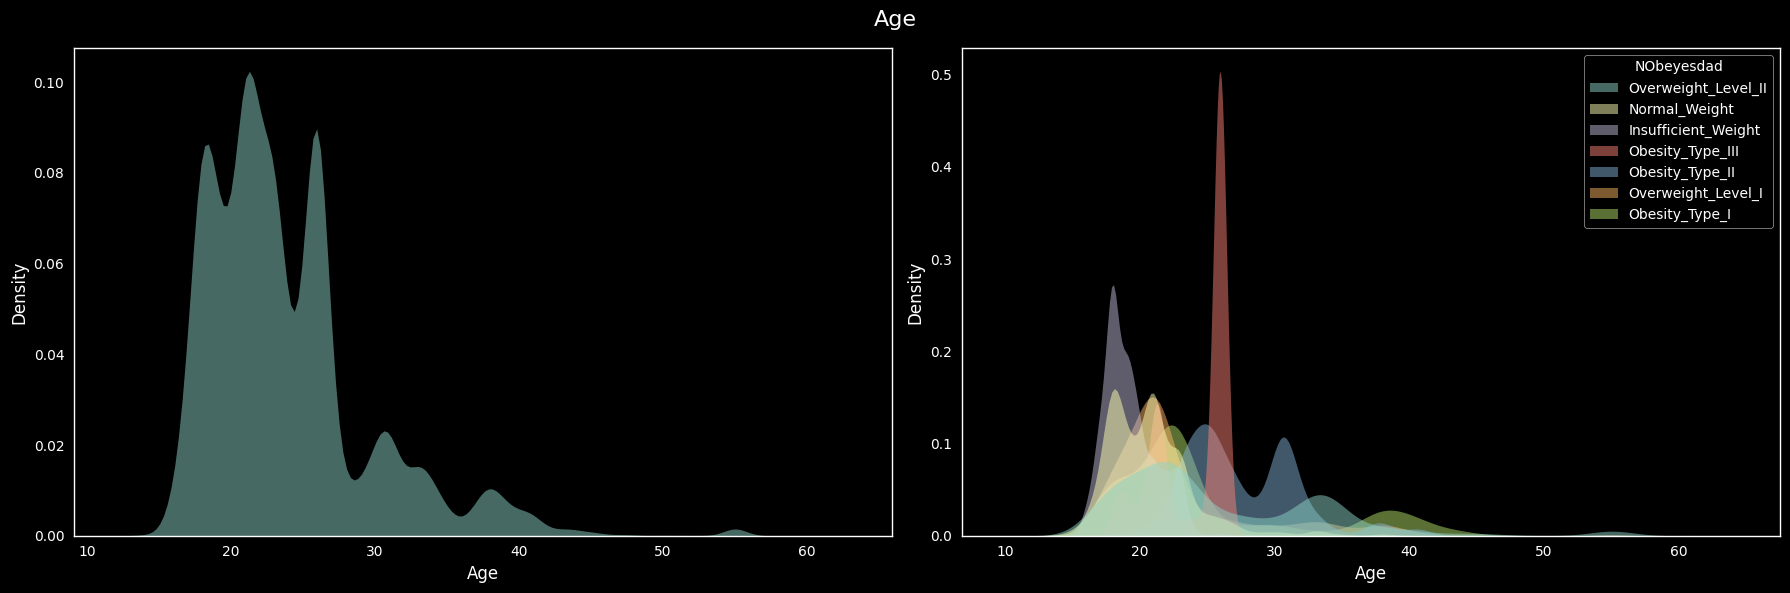

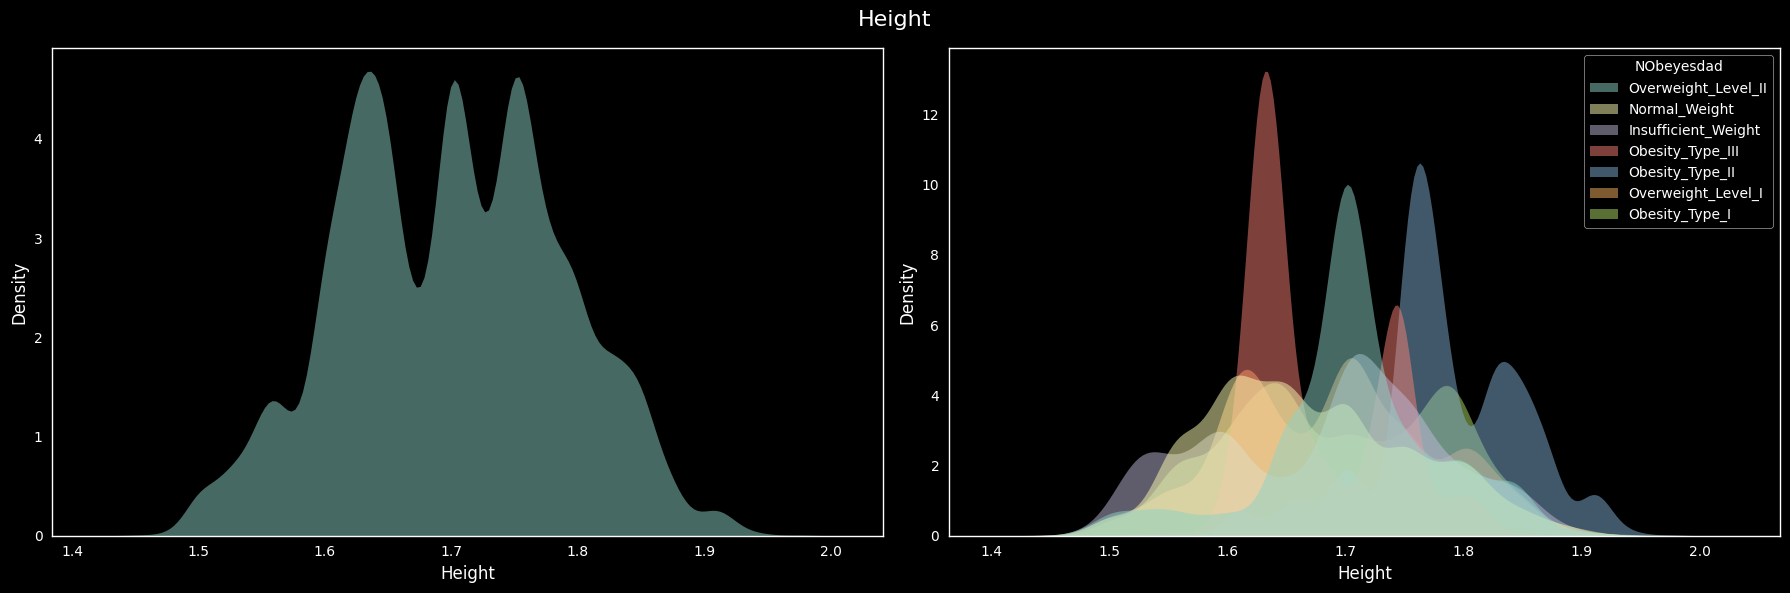

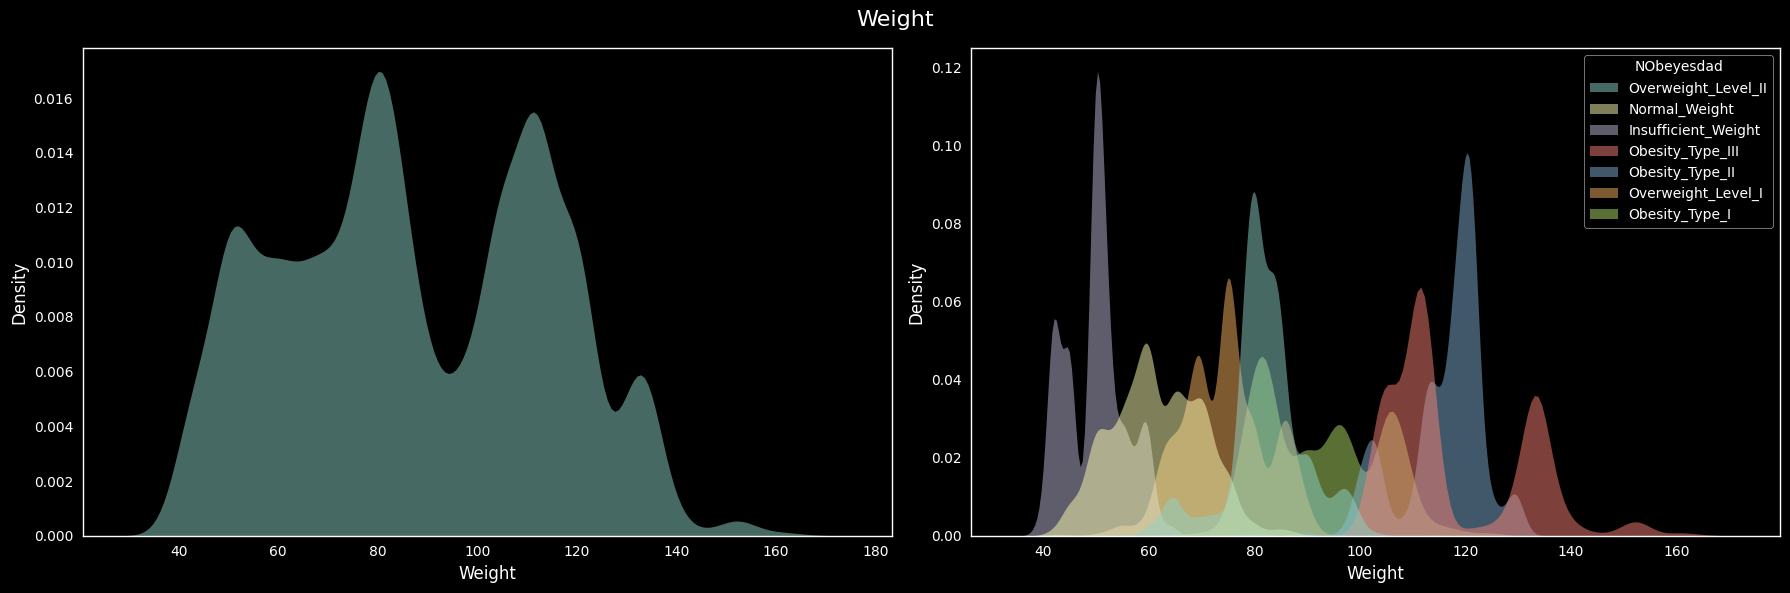

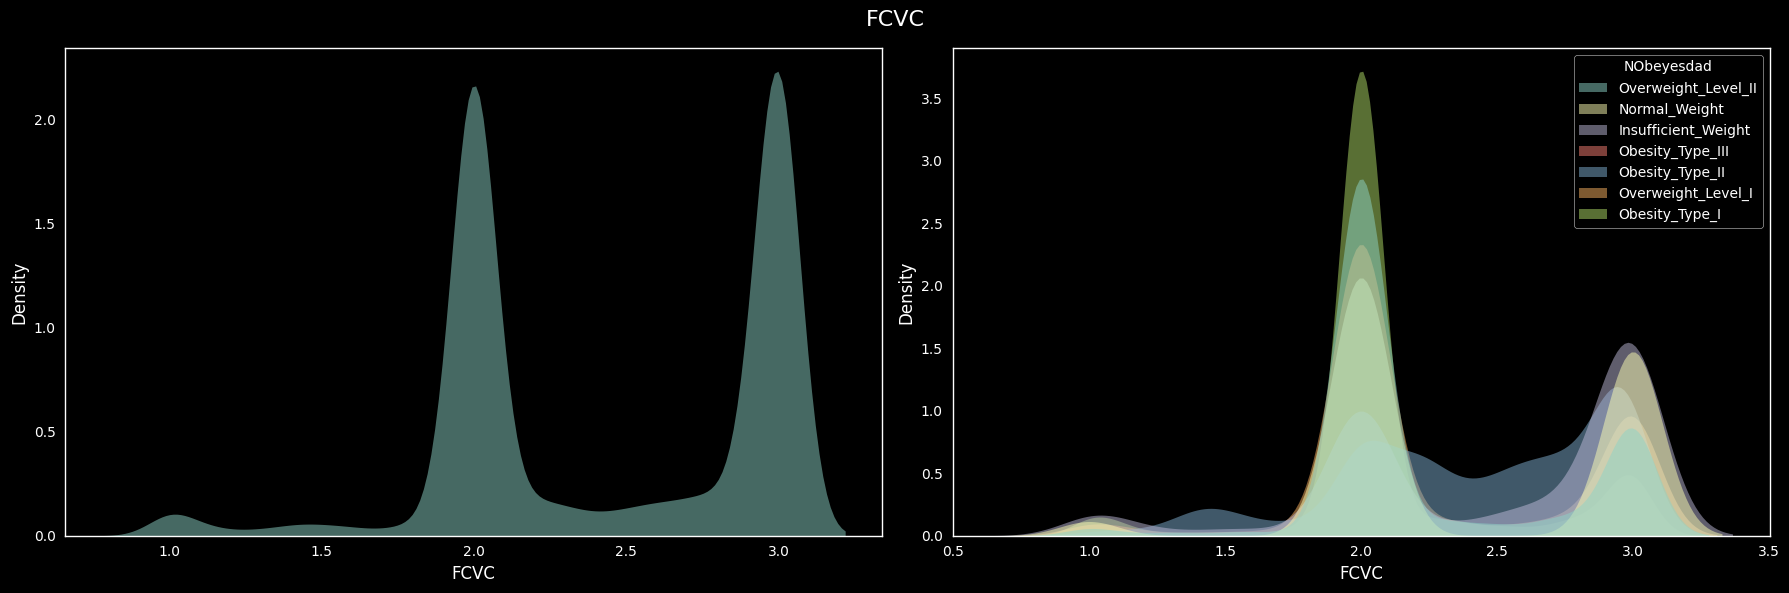

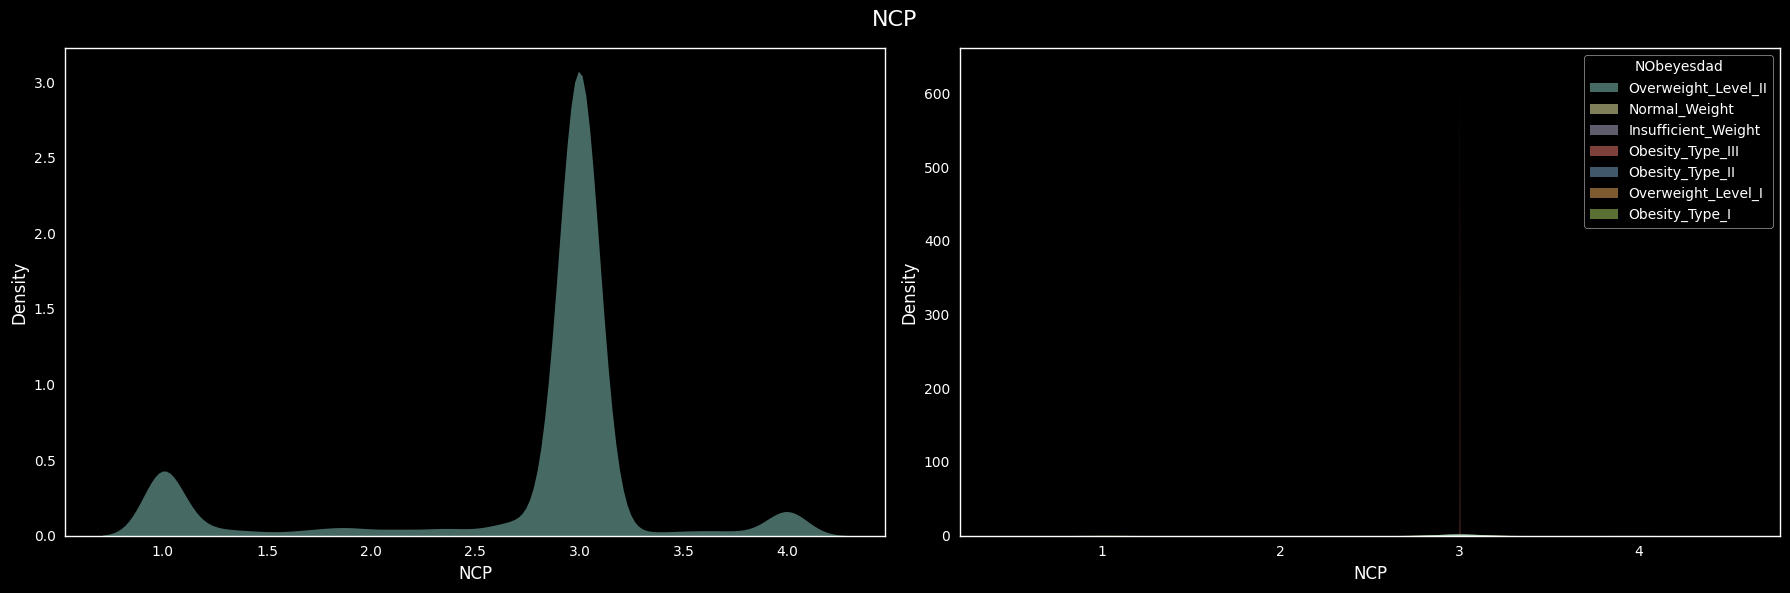

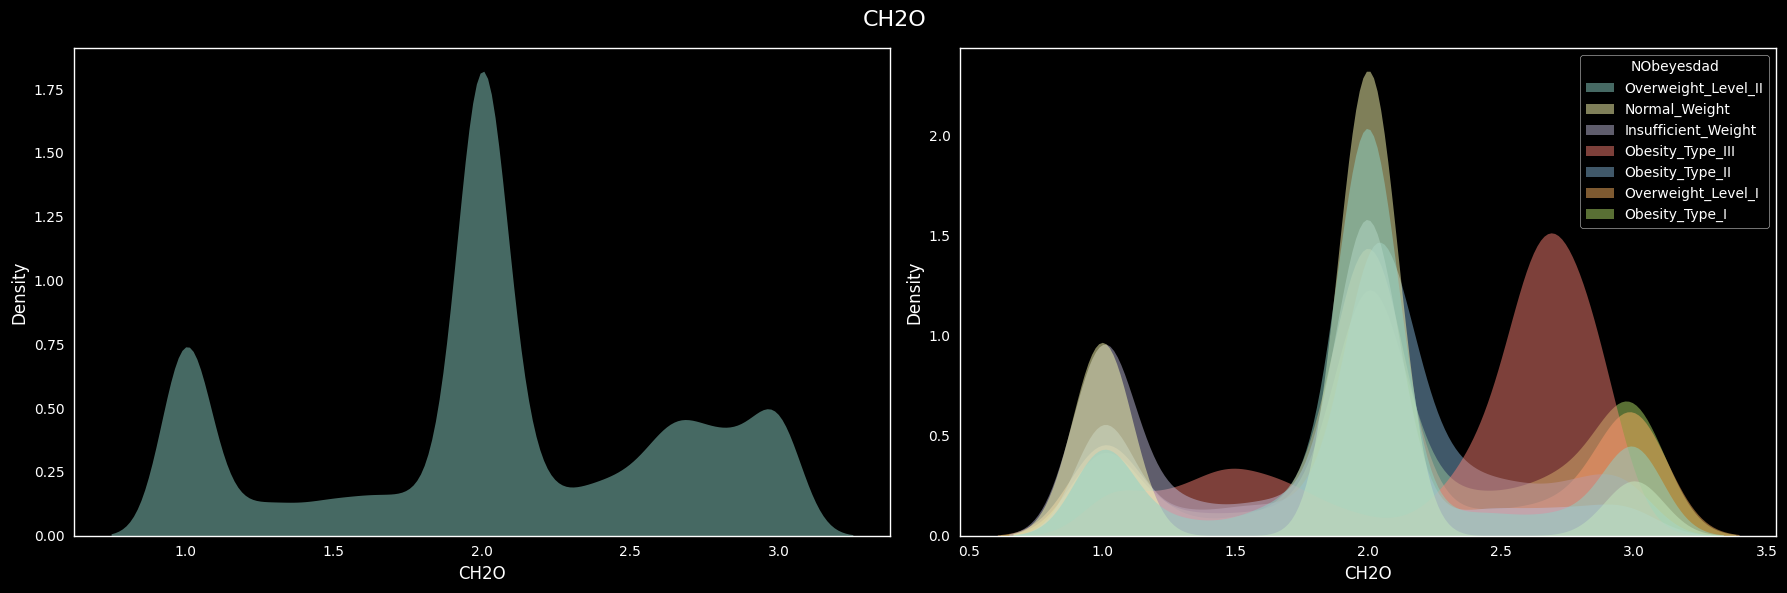

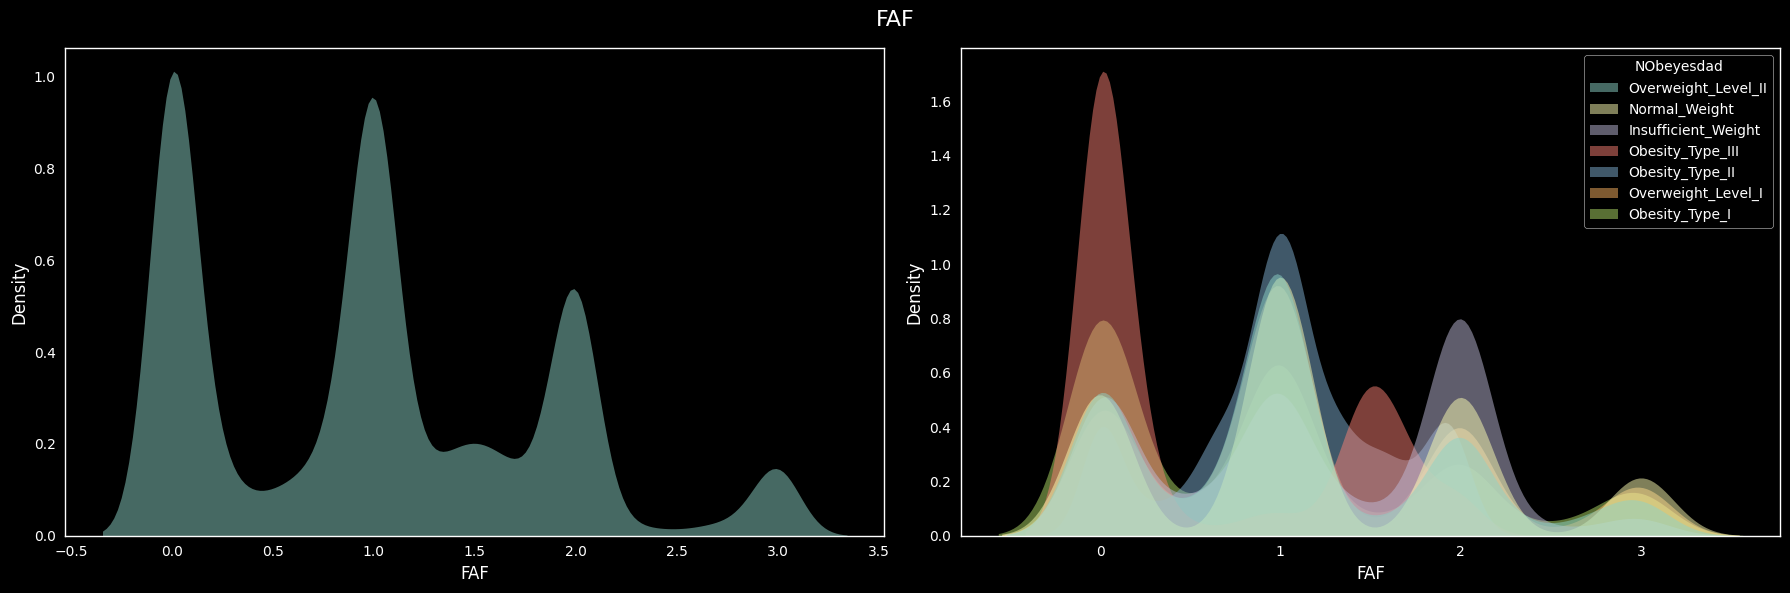

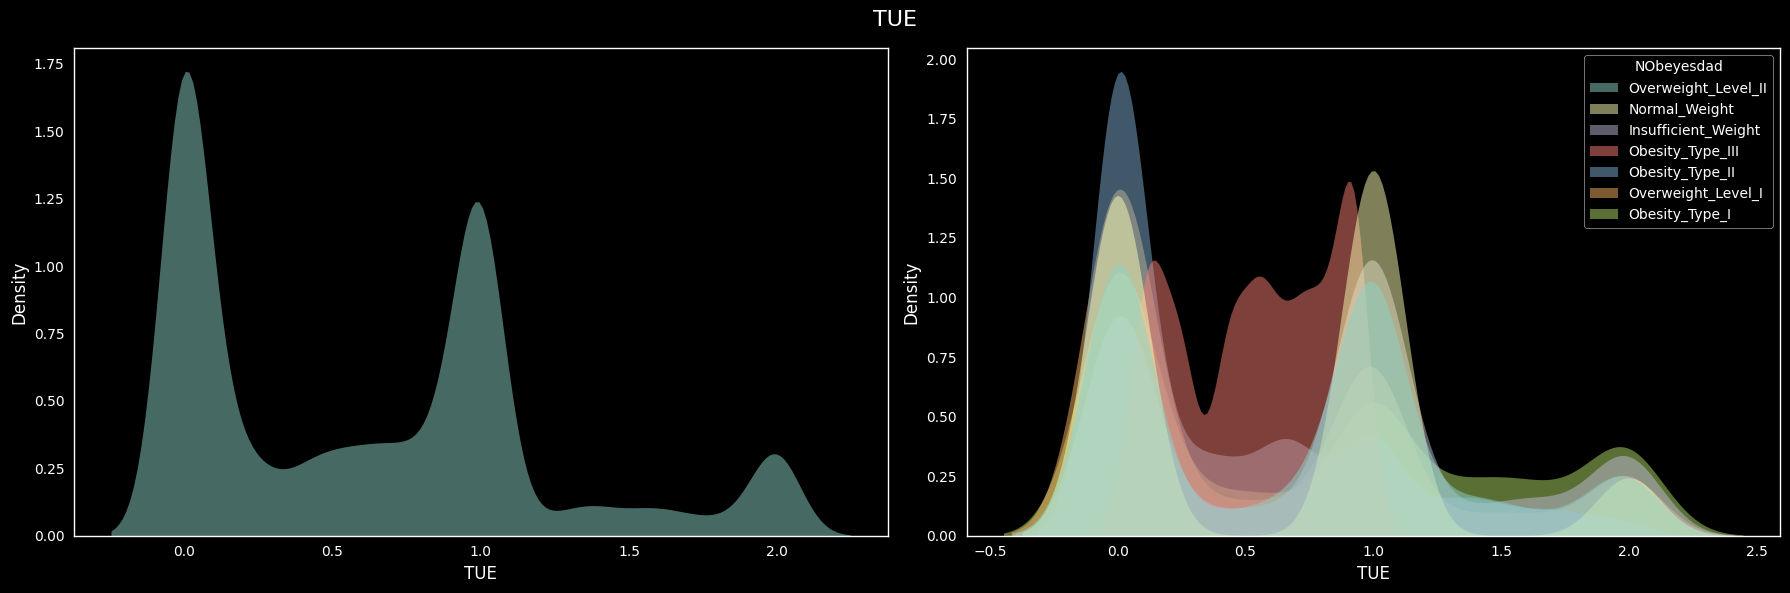

In [18]:
style = 'dark_background'
for col in num_cols[1:]:
    kde_plots(df_train, col, style, hue='NObeyesdad')

(0.0, 5.0)

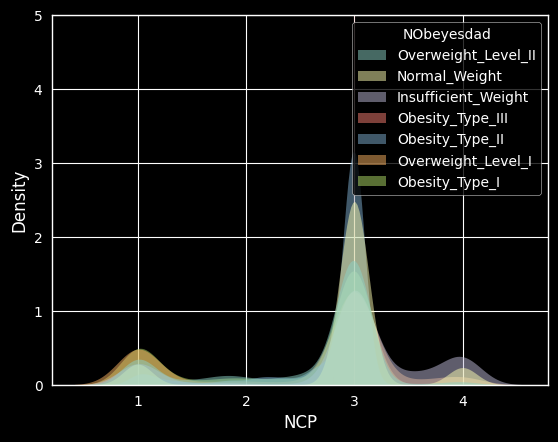

In [19]:
plt.style.use(style)
fig_dis_hue = sns.kdeplot(data=df_train,
                     x='NCP', 
                     common_norm=False, 
                     alpha=.5, 
                     linewidth=0,
#                      ax=axes[1],
                     fill=True,
                     hue='NObeyesdad'
                         )
# plt.xlim(2.5, 4)
plt.ylim(0, 5)

In [21]:
def hist_plots(dataframe, col_name, style, hue=None):
    plt.style.use(style)
    figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    figure.suptitle(col_name, fontsize=16)
    
    
    fig_dis = sns.histplot(data=dataframe,
                         x=col_name, 
                         common_norm=False, 
                         alpha=.5, 
                         fill=True,
                         kde=True,
                         linewidth=0,
                         ax=axes[0])
#     axes[0].set_ylim(0, 1000)
    axes[0].grid(False)
    
    fig_dis_hue = sns.histplot(data=dataframe,
                         x=col_name, 
                         common_norm=False, 
                         alpha=.5, 
                         linewidth=0,
                         ax=axes[1],
                         fill=True,
                         kde=True,
                         hue=hue)
    
#     axes[1].set_ylim(0, 1000)
    axes[1].grid(False)
    
    plt.tight_layout()
    plt.show()
    

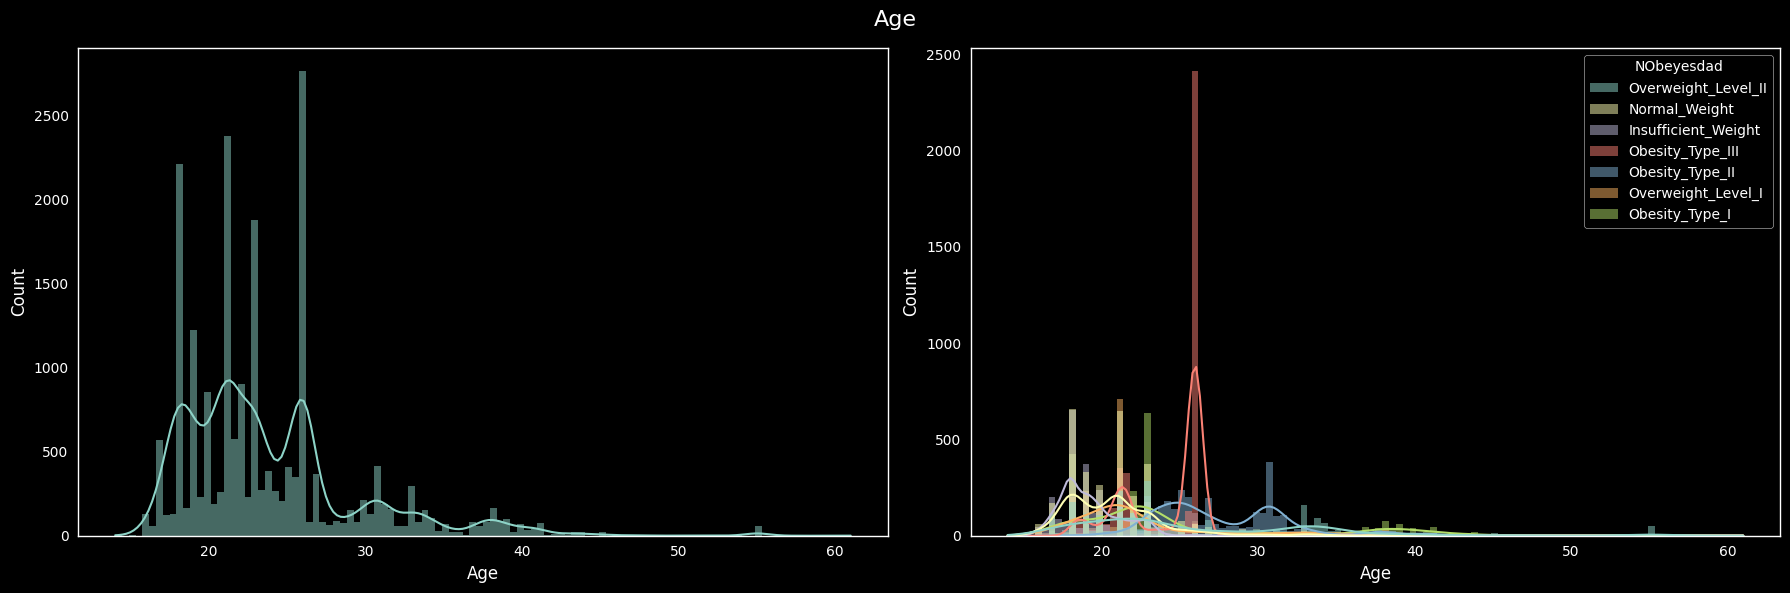

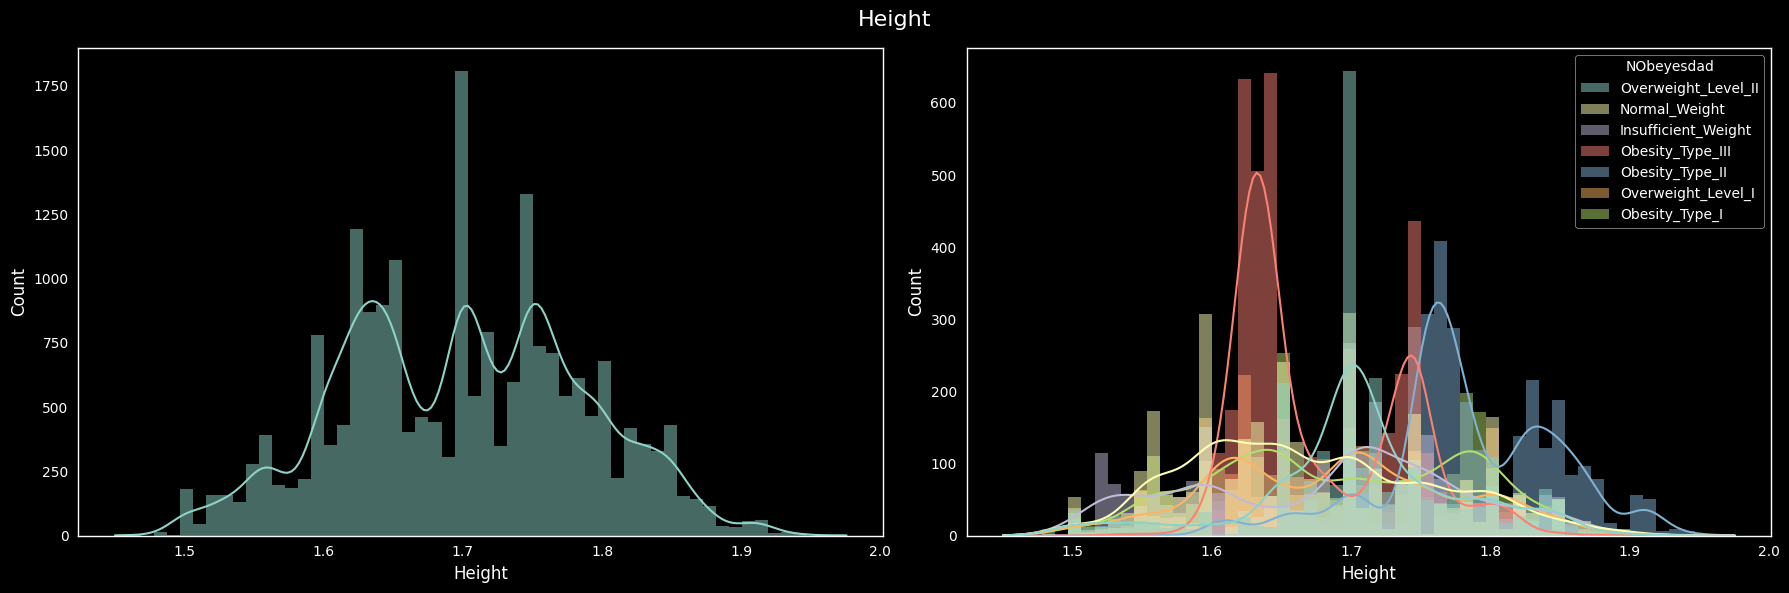

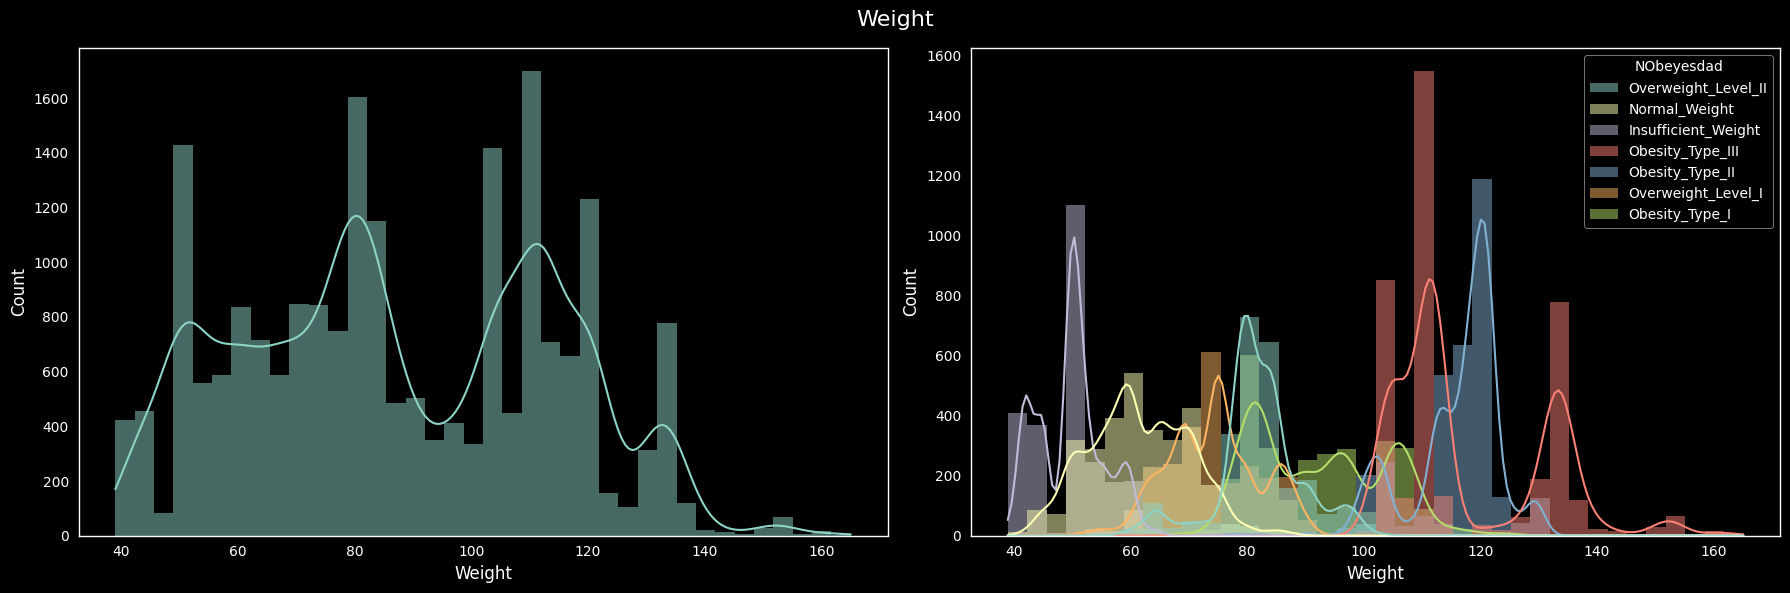

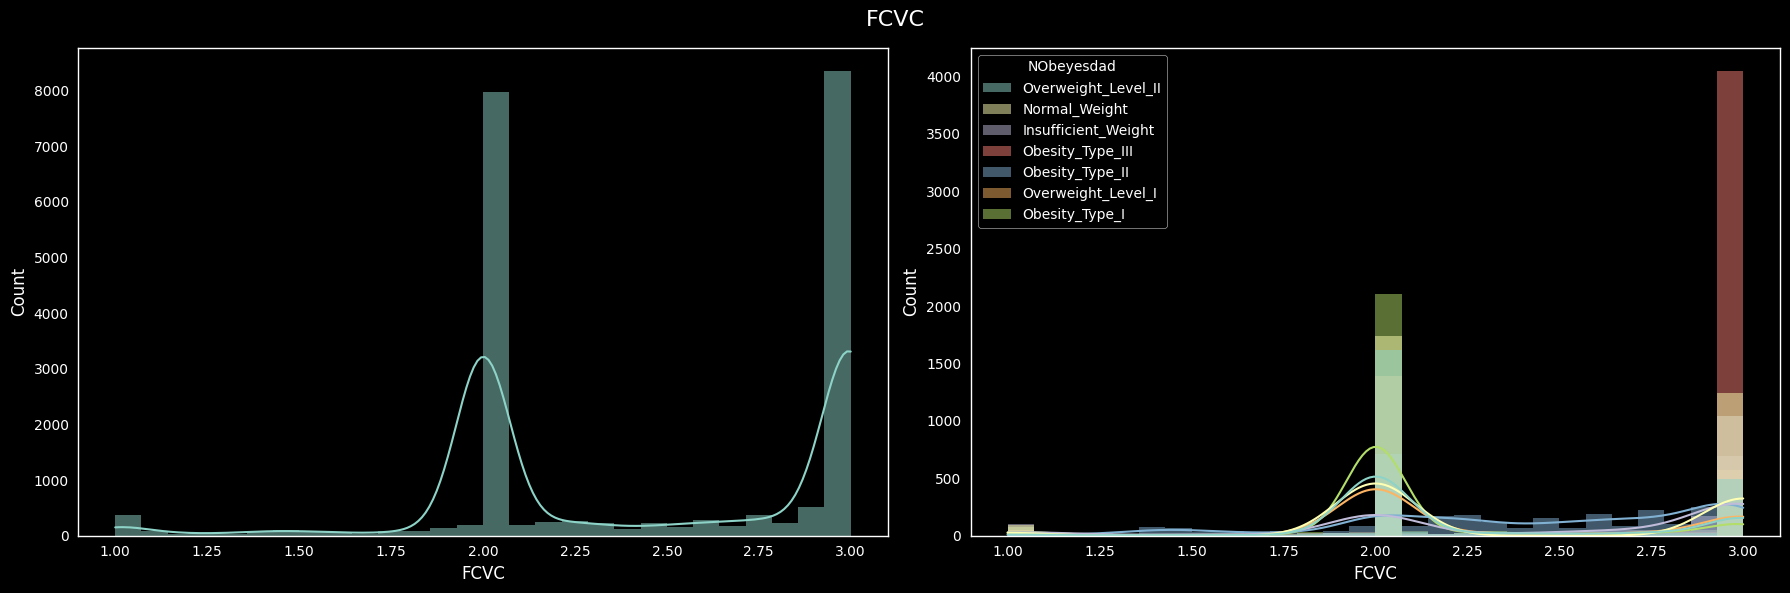

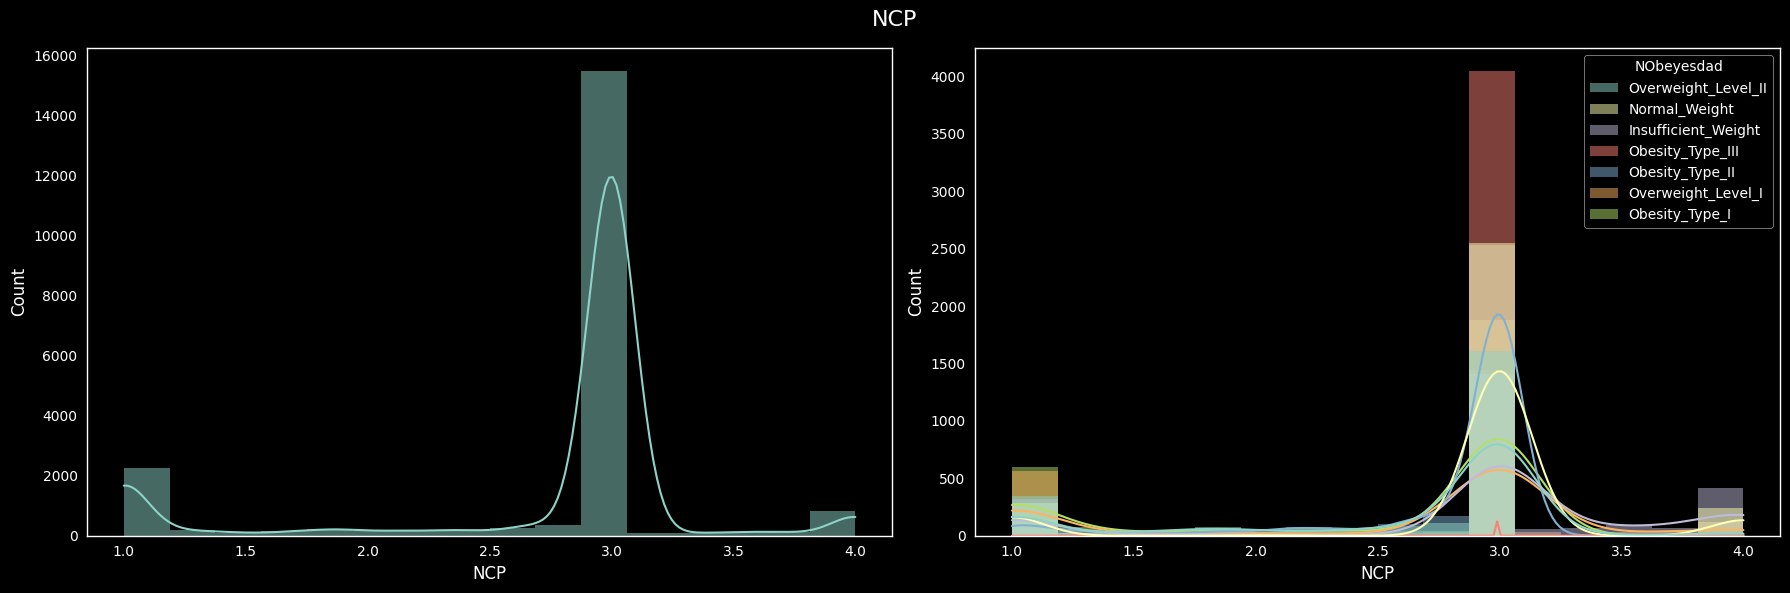

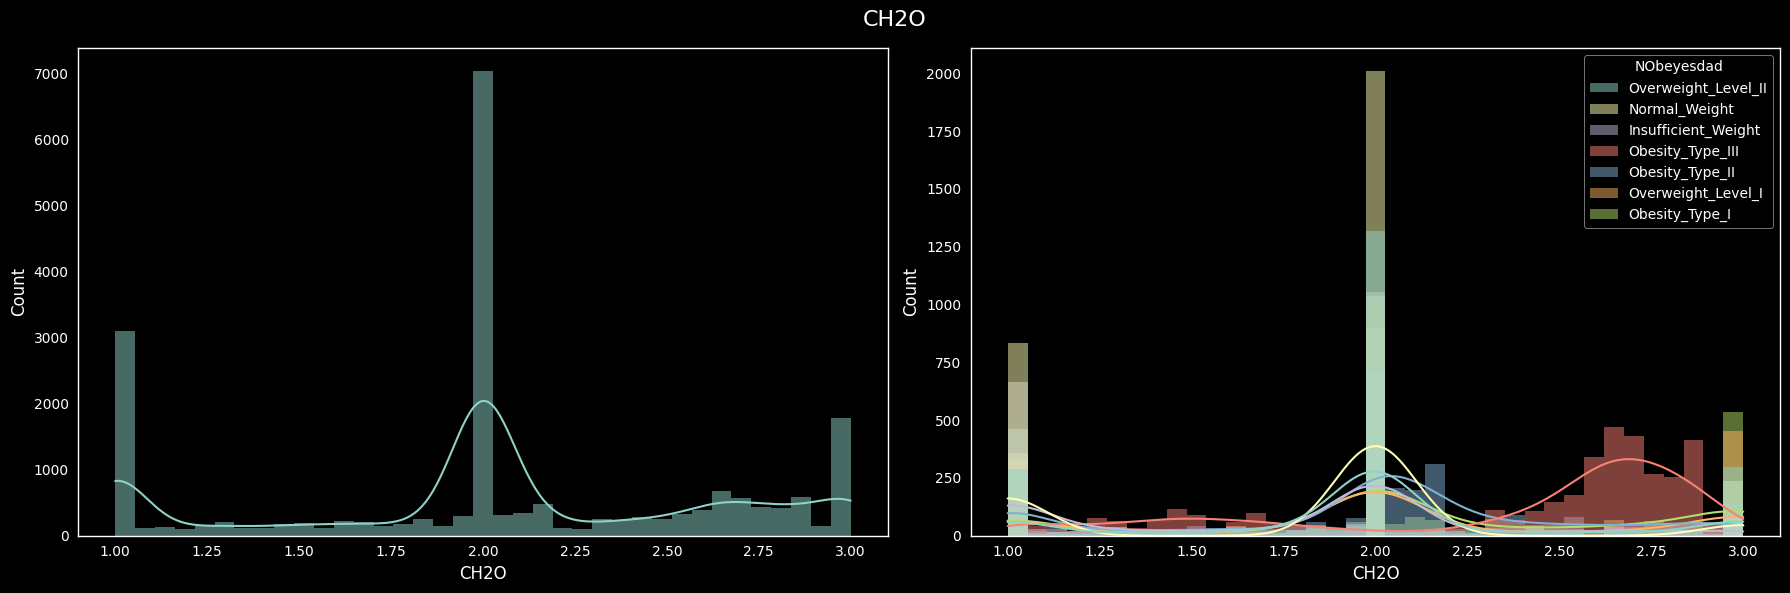

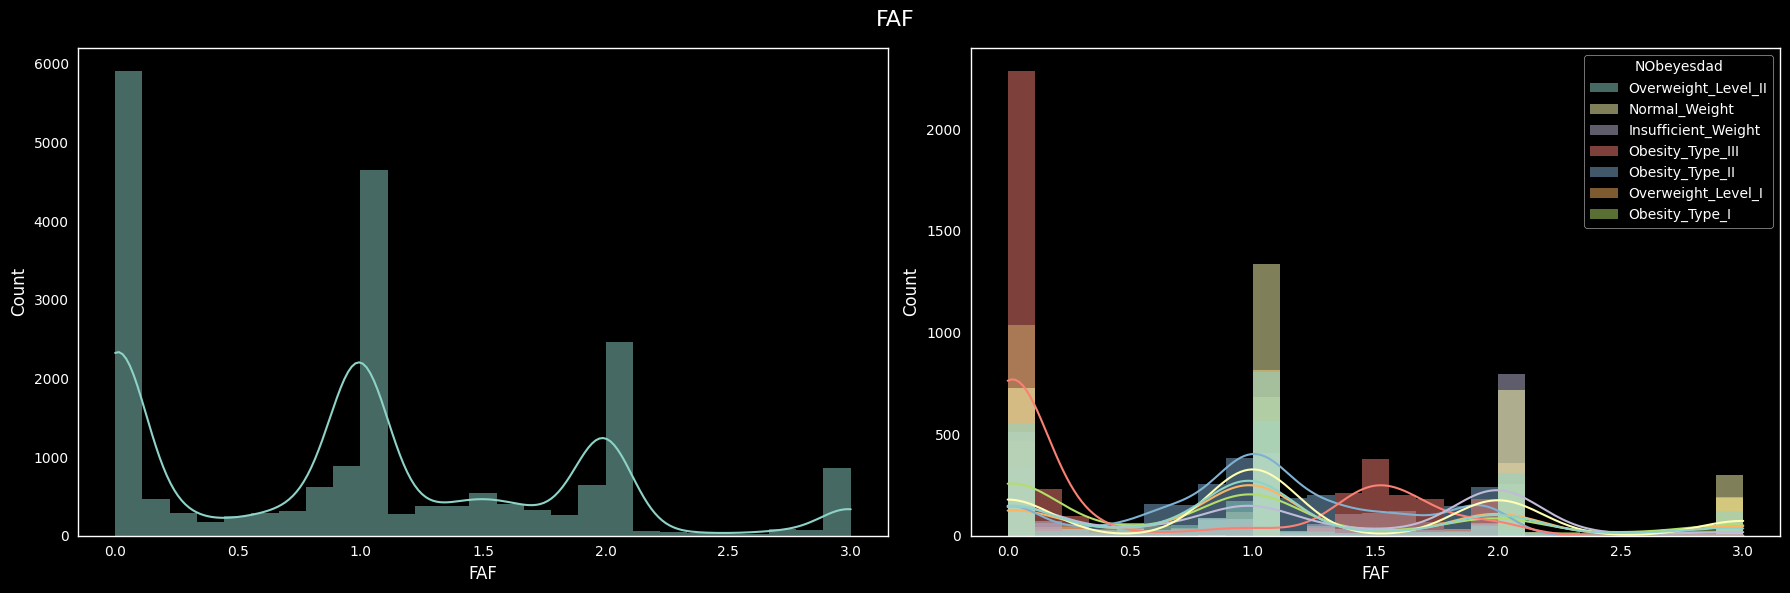

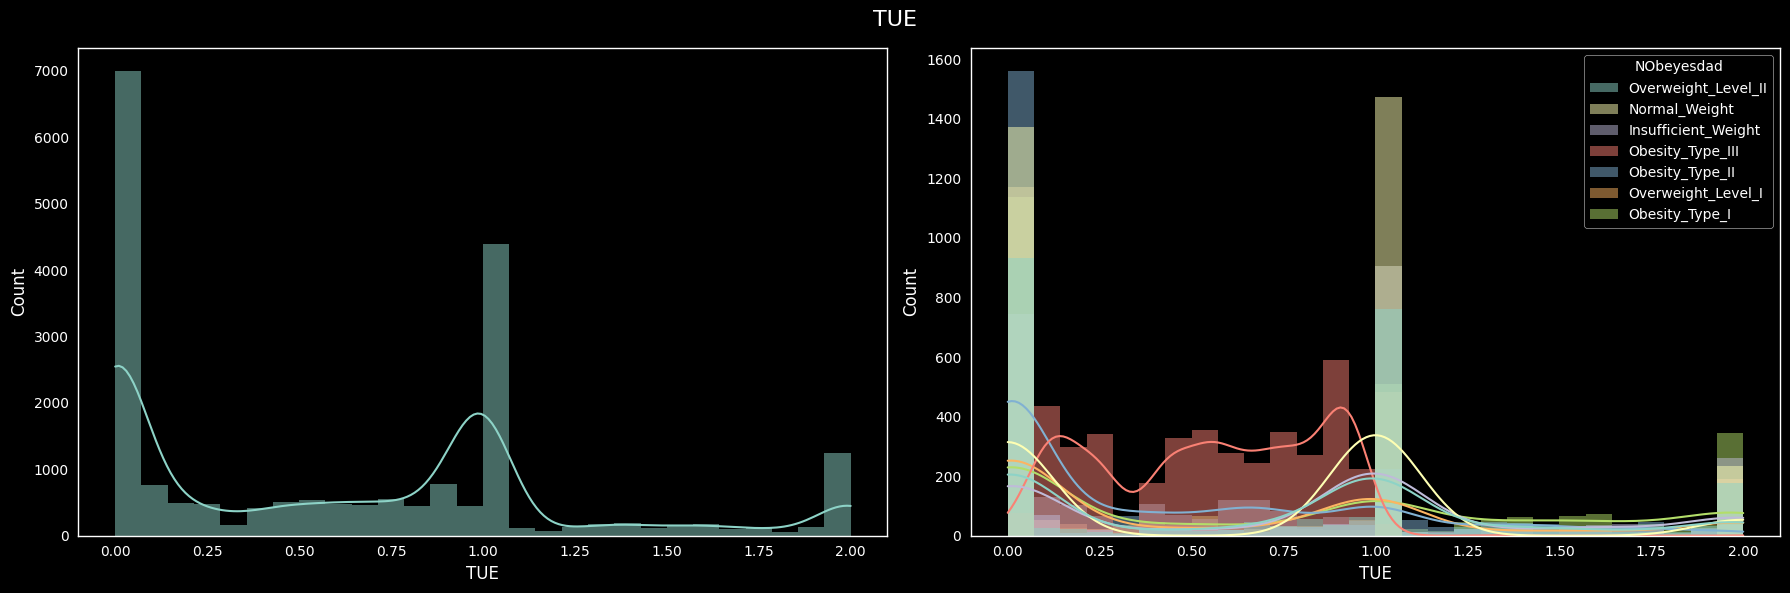

In [22]:
# style = 'seaborn-v0_8-notebook'
style = 'dark_background'
for col in num_cols[1:]:
    hist_plots(df_train, col, style, hue='NObeyesdad')

In [ ]:
def swarm_plots(dataframe, col_name, style, hue):
    plt.style.use(style)
    figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
    figure.suptitle(col_name, fontsize=16)
    
    swarm_fig = sns.swarmplot(data=dataframe,
                              x='NObeyesdad',
                              y=col_name,
                              hue=hue,
                              dodge=True)
    
    plt.tight_layout()
    plt.show()

In [23]:
def percent_plots(dataframe, col_name, style):
    plt.style.use(style)
    figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
    figure.suptitle(f"{col_name} Percentage of NObeyesdad")

    fig_percent = sns.countplot(dataframe, 
                                x="NObeyesdad",
                                hue=col_name,
                                dodge=True,
                                stat='percent',
                                ax=axes)
    axes.grid(False)
# fig_percent.set_xlabel('')
    fig_percent.set_ylabel('')
#     axes.set_yticks(rotation=45)
    fig_percent.set_yticklabels('')
    
    

    

# fig_percent.set_yticks(rotation=45)
#     axes[2].grid(False)

    for p in fig_percent.patches:
        height = p.get_height()

        fig_percent.text(x=p.get_x() + (p.get_width() / 2),
                        y=height + .2,
                        ha='center',
                        s = f'{round(height, 3)} %',
                        fontsize=9,
#                         **label_font
                        )
    
    plt.tight_layout()
    plt.show()

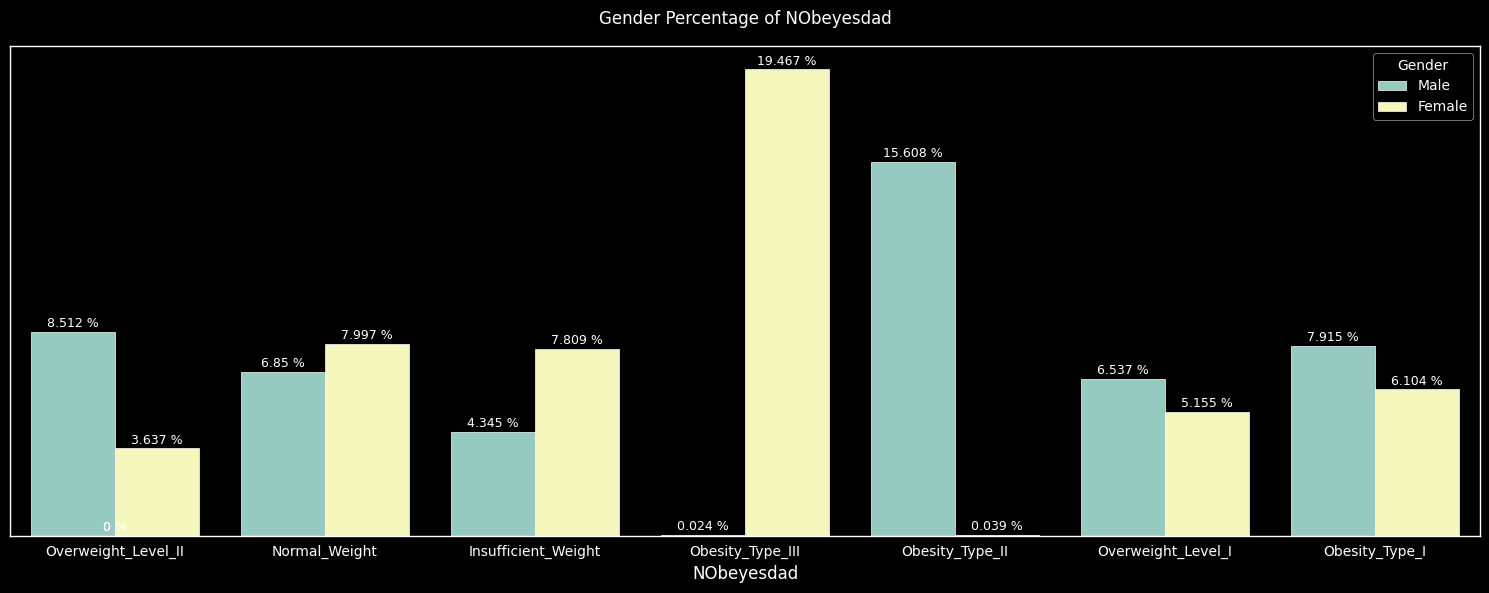

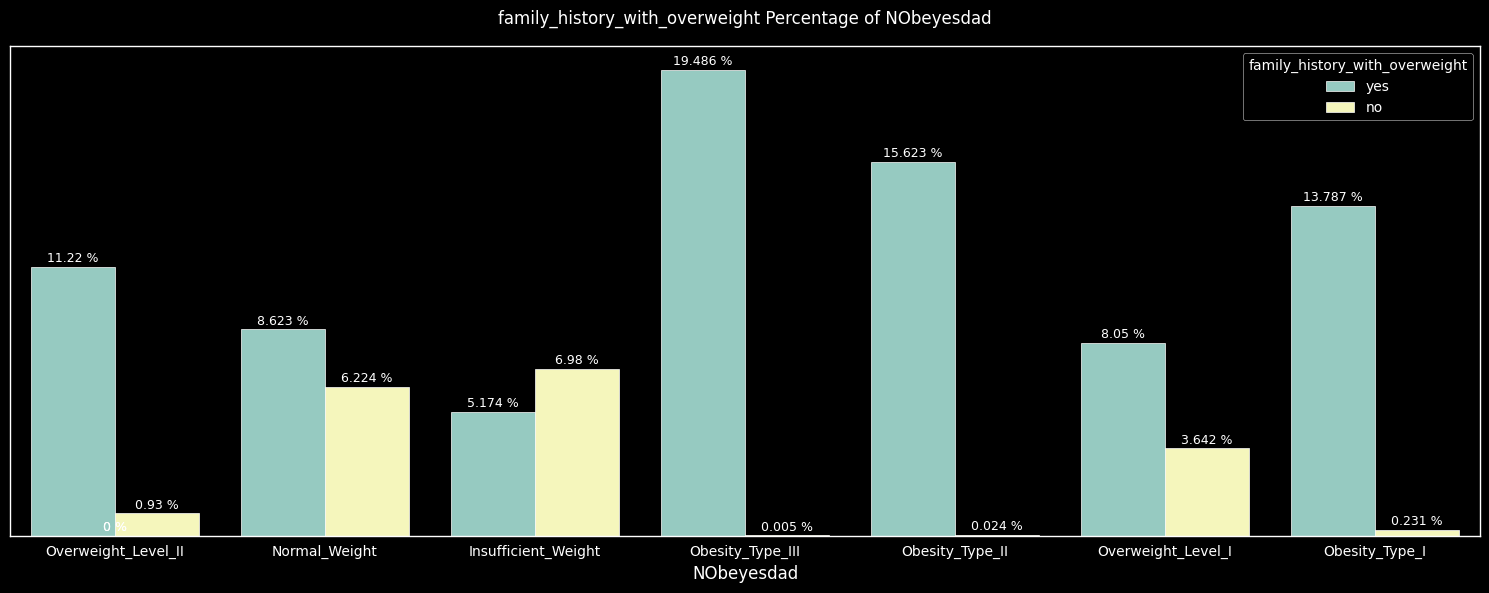

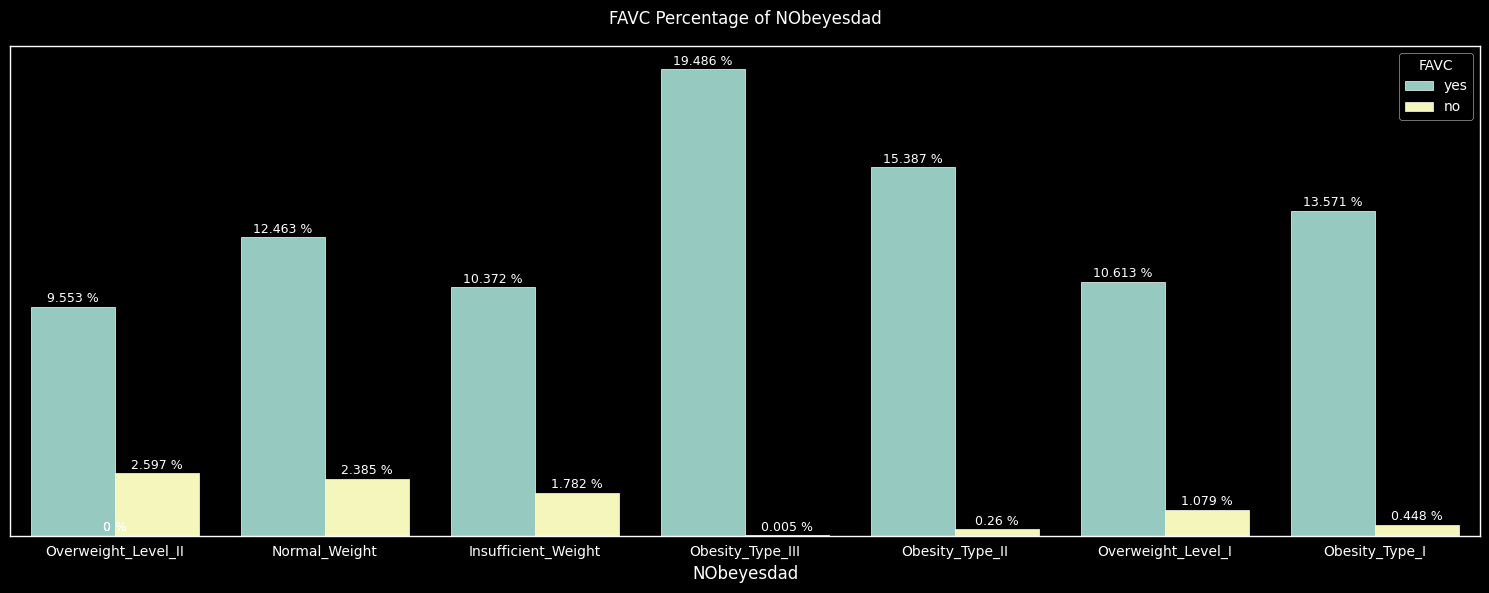

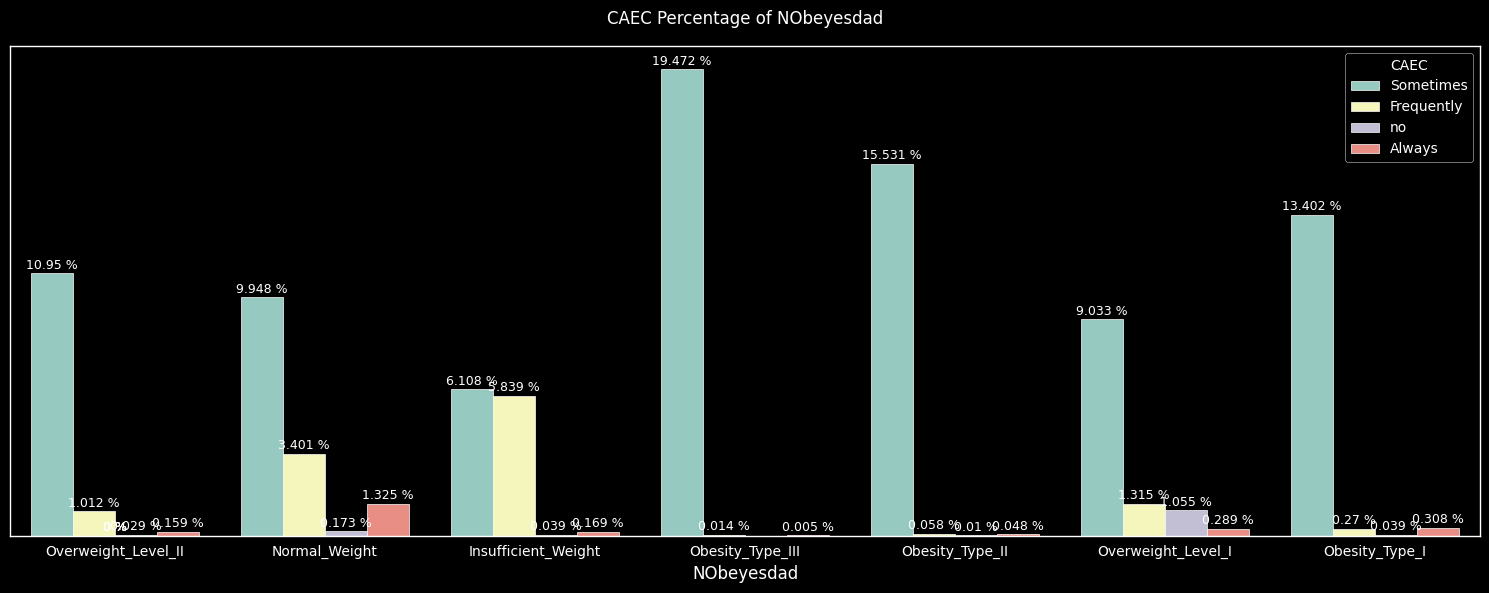

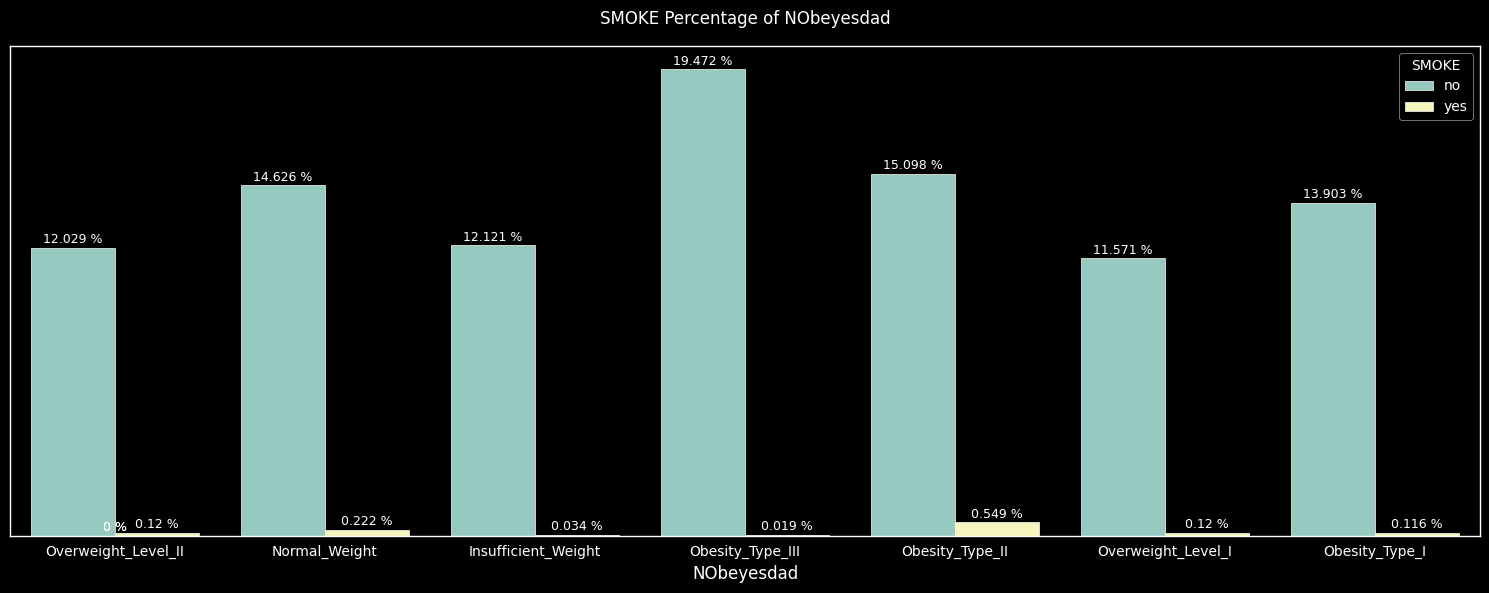

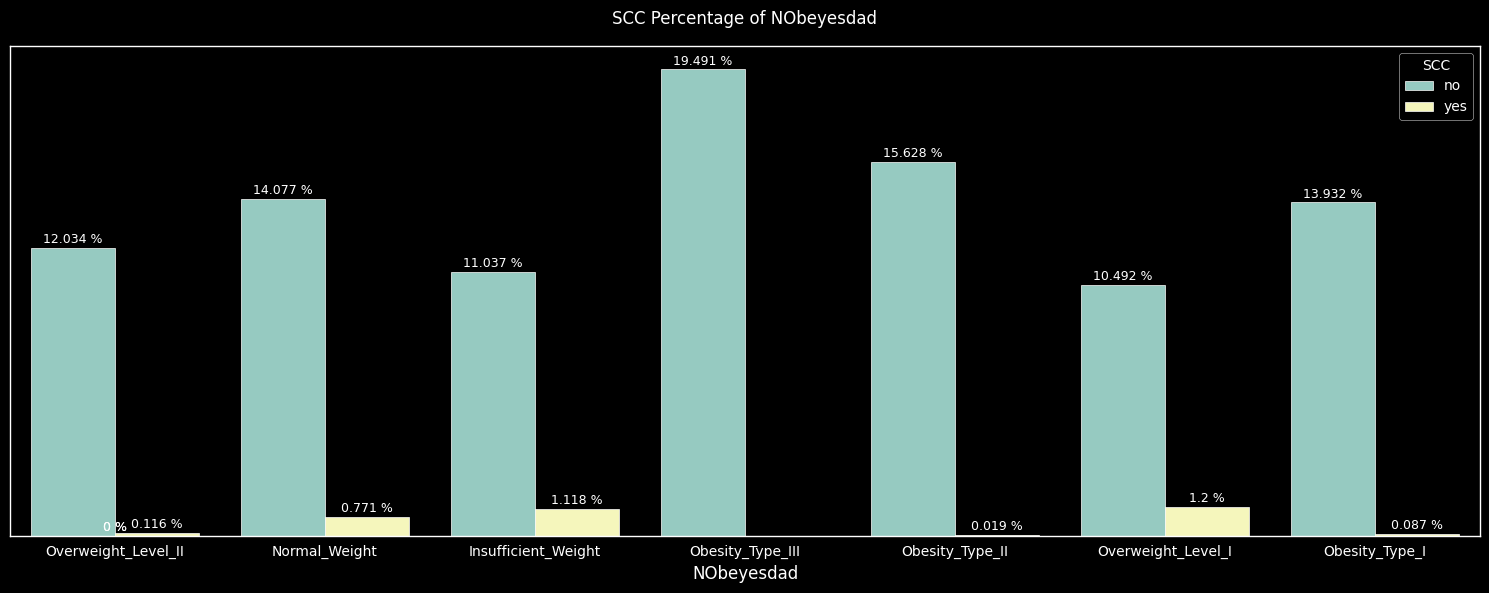

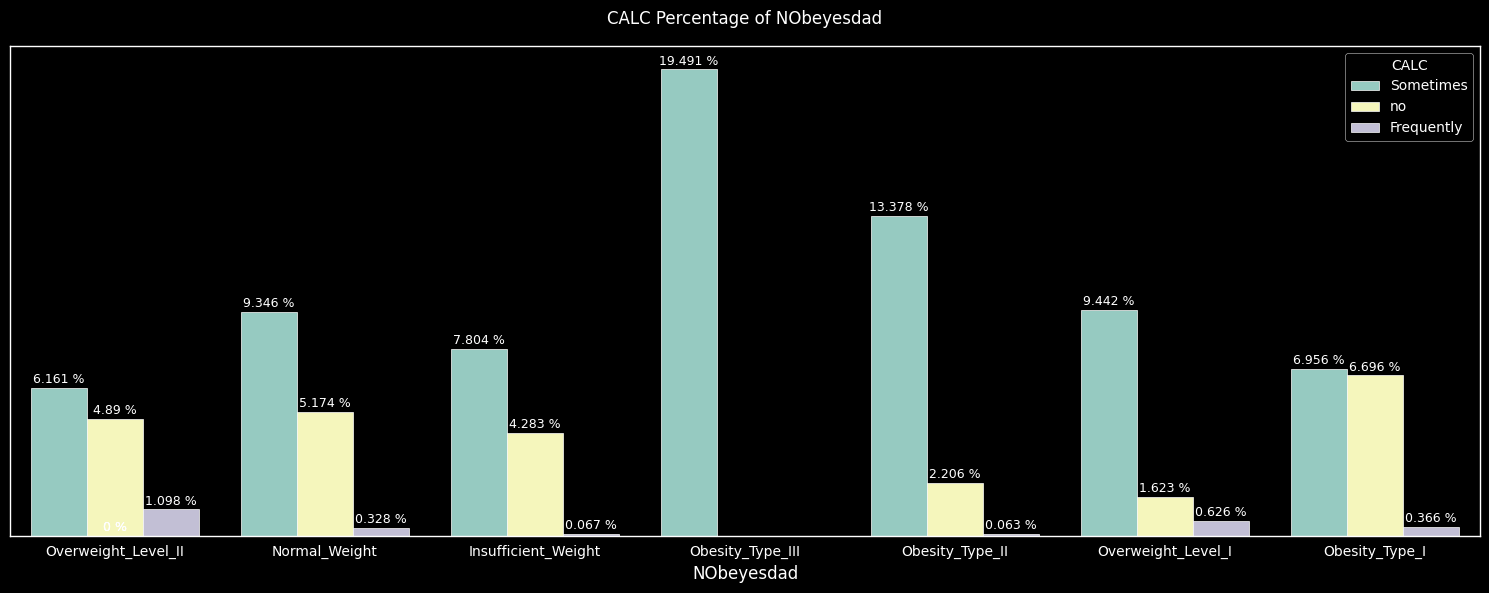

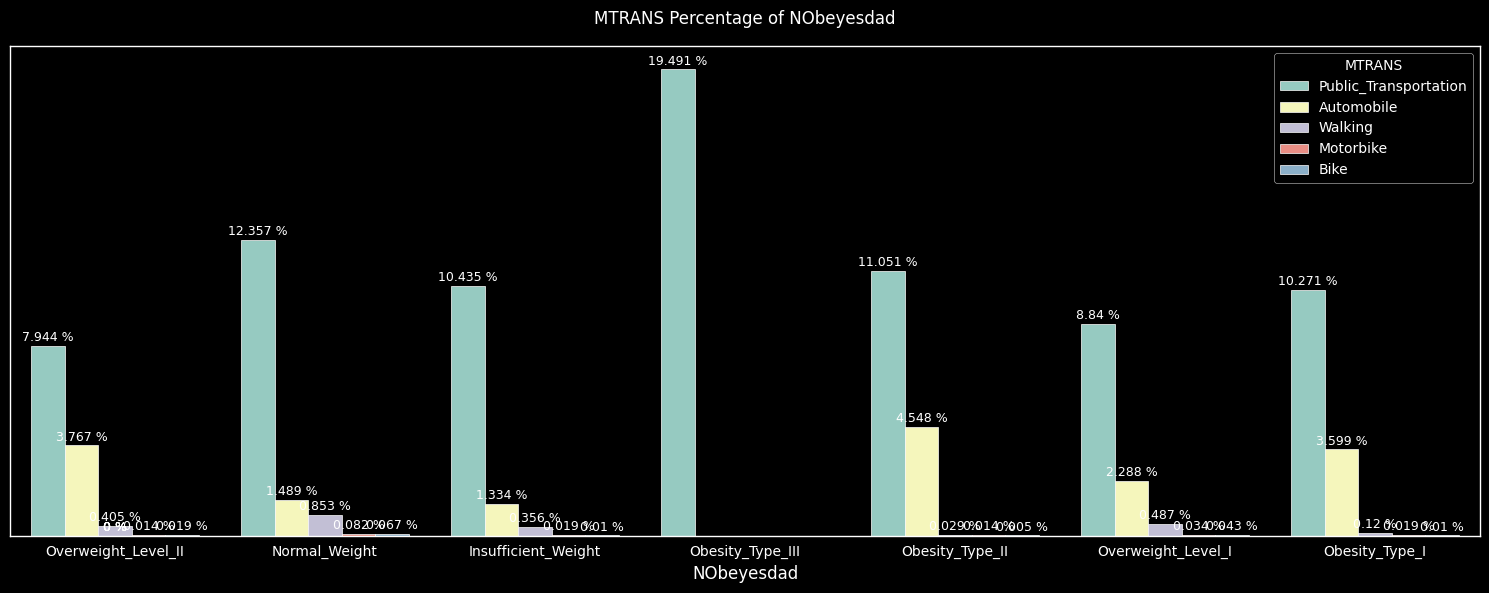

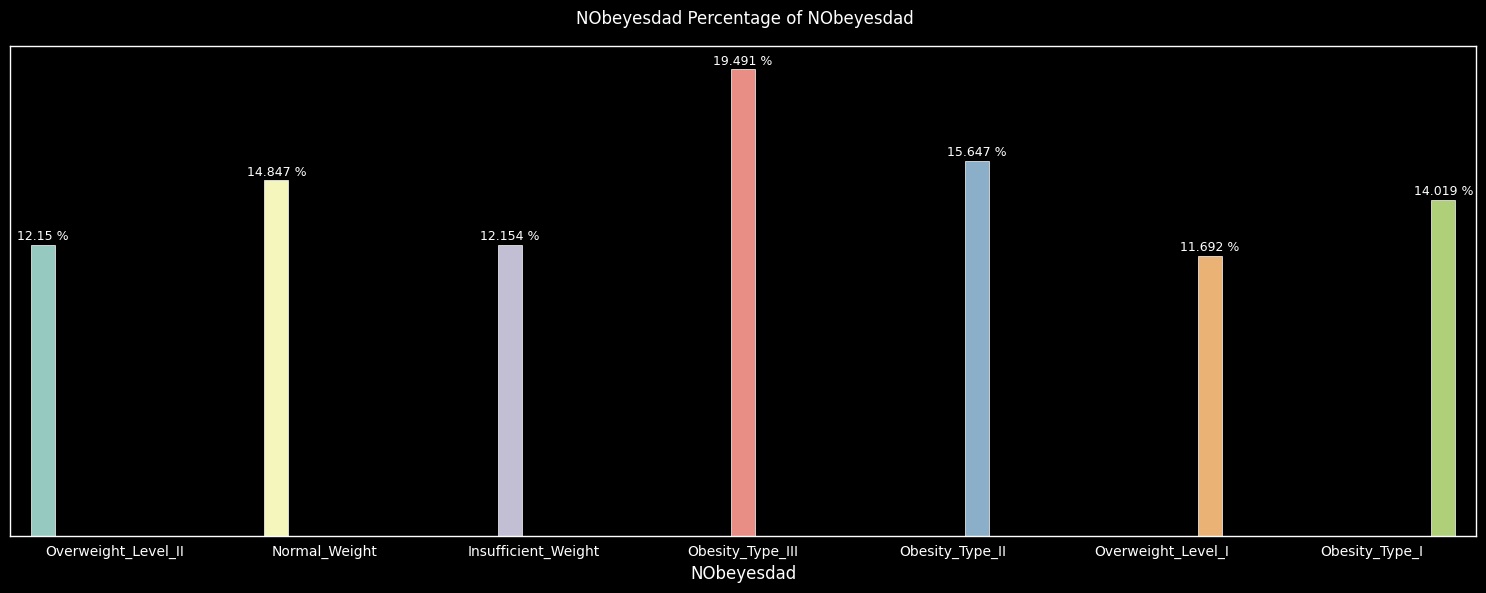

In [24]:
style = 'dark_background'
# style = 'ggplot'
for col in cat_cols:
    percent_plots(df_train, col, style)

In [ ]:
plt.style.available

In [ ]:
pd.pivot_table(data=df_train,
              values='Age',
              index=['Gender', 'NObeyesdad'],
              aggfunc='mean').reset_index()

In [ ]:
target_df = pd.DataFrame(df_train['NObeyesdad'].value_counts()).reset_index()

In [ ]:
target_df['pct'] = target_df['count'].apply(lambda x: np.round((x / target_df['count'].sum()) * 100, 2) )

In [ ]:
target_df

In [ ]:
plt.pie(target_df['pct'].values, labels=target_df['NObeyesdad'].values)

In [ ]:
df_train.columns

In [ ]:
sns.scatterplot(data=target_df, x="count",
                y="NObeyesdad", hue="NObeyesdad",
                size="NObeyesdad",
                sizes=(300, 5000), legend=False,
                )